# Computational Health Informatics : Project I - Structured Data Sets with ML

The aim of this project is to utilize train 5 machine learning algorithms on both Wisconsin Breast cancer data and Heart Disease data. During this project we will be implementing various Data Cleaning, Processing, Transforming, Training and Testing procedures to better understand the scope of Machine Learning in Healthcare data analysis.  them:

## Analysis on the Breast Cancer Wisconsin Dataset

### Dataset Overview:

The Breast Cancer Wisconsin dataset, sourced from UCI Machine Learning Repository is a publicly available dataset that includes features computed from images of fine needle aspirate (FNA) of breast masses. The dataset consists of 569 samples with a total of 31 features among which 30 numerical features, which describe the characteristics of the cell nuclei present in the images. The target variable is the diagnosis of the tumors, which can be either benign (coded as 0) or malignant (coded as 1)

### Attribute Information: 

The Breast Cancer Wisconsin Data Set includes 30 features derived from digitized images of fine needle aspirate (FNA) of breast masses. These features describe various characteristics of the cell nuclei, including:

Radius1, Texture1, Perimeter1, Area1, Smoothness1, etc.: These columns represent measurements related to the tumor cells. For example:

Radius1: Mean of distances from the center to points on the perimeter.

Texture1: Standard deviation of gray-scale values.

Perimeter1: Total perimeter of the tumor.

Area1: Area of the tumor.

Smoothness1: Measures how smooth the tumor's boundary is.

Compactness1, Concavity1, Concave points1: These measure the compactness and degree of concavity of the tumor.

Symmetry1: Measures how symmetrical the tumor is.

Fractal_dimension1: Quantifies the complexity of the tumor's boundary.

Texture3, Perimeter3, Area3, etc.: These are similar features but represent other statistical measures, such as worst or extreme values observed in the tumor.

Diagnosis: The target variable where 1 indicates a malignant tumor, and 0 indicates a benign tumor.

The target variable is 'Diagnosis' of the tumors, which can be either benign (coded as 0) or malignant (coded as 1). 

In [291]:
#Breast Cancer Wisconsin Diagnostic Dataset

#Importing Necessary Libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from prettytable import PrettyTable
from tabulate import tabulate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [292]:
#Importing the Dataset
from ucimlrepo import fetch_ucirepo 
  
#Fetching the dataset 
breast_cancer_wisconsin_diagnostic_data = fetch_ucirepo(id=17) 
df=breast_cancer_wisconsin_diagnostic_data
#Data (as pandas dataframes) 
X = df.data.features 
y = df.data.targets 

In [293]:
# Check the number of rows in X and y
print("Rows, Columns:")
print("In Feature Variable :", X.shape)
print("In Target Variable :",y.shape)

Rows, Columns:
In Feature Variable : (569, 30)
In Target Variable : (569, 1)


In [295]:
# Combine X and y into a single DataFrame
breast_cancer_data = pd.concat([X, y], axis=1)
breast_cancer_data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [296]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [297]:
breast_cancer_data.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From the descriptive statistics, tumors with higher values in features such as radius, perimeter, and area tend to be malignant (as all rows here have a diagnosis of 1). The dataset captures both mean values (e.g., radius1, texture1) and worst-case values (e.g., texture3, perimeter3) of these features, providing a more comprehensive view of the tumor's characteristics.

In [299]:
breast_cancer_data['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

### Data Pre-processing:

a) Checking for empty or missing values: 

In [300]:
#Check if the dataset is empty
print(df is None)

False


In [302]:
#Check for null values
print(breast_cancer_data.isnull().sum())

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64


There are no null values in the dataset. 

b) ***Label Encoding categorical features*** : 
We encoded the target variable 'Diagnosis' to represent benign as 0 and malignant as 1.s.

In [303]:
#Label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#Initialize the label encoder
label_encoder = LabelEncoder()
# Encode the 'Diagnosis' column
breast_cancer_data['Diagnosis'] = label_encoder.fit_transform(breast_cancer_data['Diagnosis'])

print(breast_cancer_data['Diagnosis'].unique())  # Should print [0, 1] for B and M respectively
print("\nCount of each class after encoding:")
print(breast_cancer_data['Diagnosis'].value_counts())  # Count of each class (0 = B, 1 = M)
breast_cancer_data.head()

[1 0]

Count of each class after encoding:
Diagnosis
0    357
1    212
Name: count, dtype: int64


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


c) Initial EDA: 

We performed initial EDA on the entire data to look at the distribution of features that are continuous.  

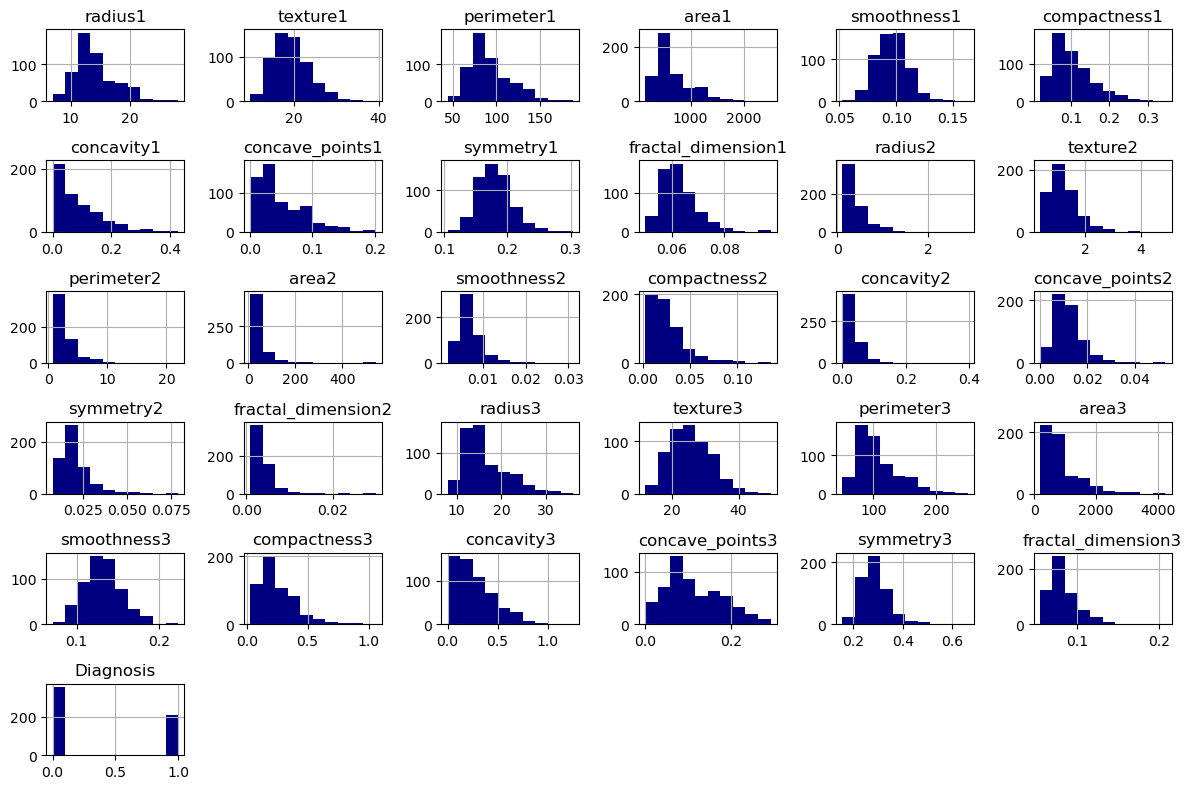

In [305]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
breast_cancer_data.hist(figsize=(12, 8), color='navy')
plt.tight_layout()  # Ensures that plots don't overlap
plt.show()

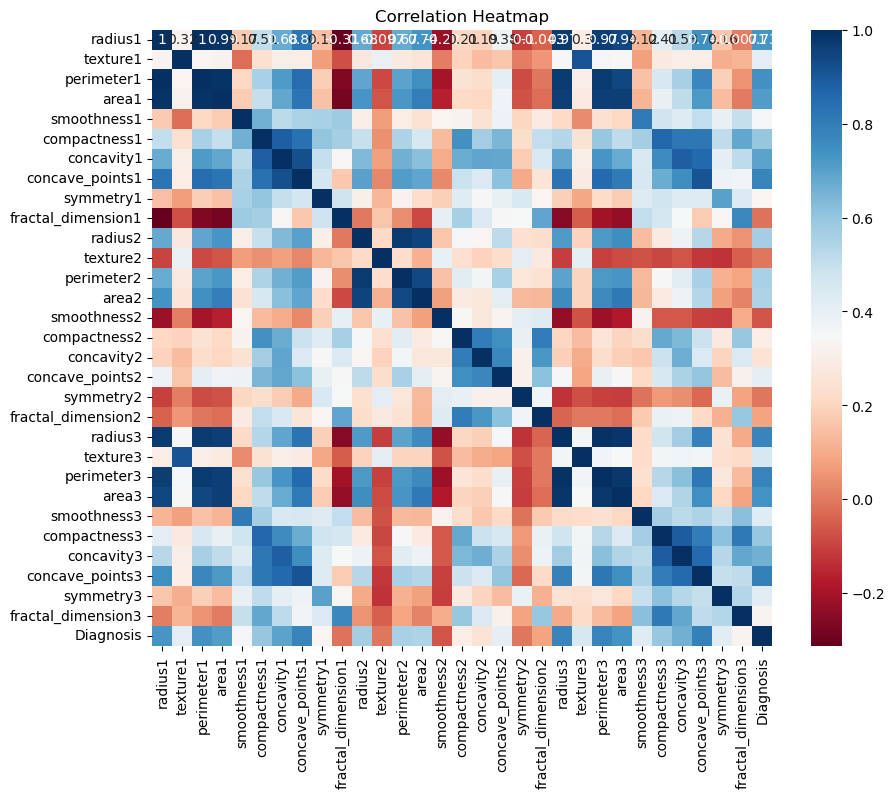

In [307]:
#Correlation heatmap before splitting
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = breast_cancer_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='RdBu') 
#other colours Blues, coolwarm, 
plt.title('Correlation Heatmap')
plt.show()

The idea of correlation heatmaps is to gain insights into the overall structure of the data. We are building this before splitting is to identify correlated features or decide to remove certain features based on the heatmap, doing this before splitting ensures consistency across the training and testing data.

d) **Data Partition:** 

We are performing Data Partition as our initial step before EDA or other processing is to ensure that the Test Data remains unseen. Employing Stratified sampling to ensure that the distribution of the target variable (classes) is preserved in both the training and testing sets, we split the data in 70:30 ratio for training and testing respectively. Using "Stratified" is particularly important when dealing with imbalanced datasets, where one class may be significantly more frequent than another. Using stratified sampling during the splitting process is essential to ensure that both sets are representative of the overall dataset, especially when dealing with imbalanced classes.

In [308]:
#Train test split
# Import the necessary library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = breast_cancer_data.drop(columns=['Diagnosis'])
y = breast_cancer_data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Check the distribution of classes in train and test sets
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Test set class distribution:\n", y_test.value_counts(normalize=True))

Training set shape: (398, 30) (398,)
Test set shape: (171, 30) (171,)
Training set class distribution:
 Diagnosis
0    0.628141
1    0.371859
Name: proportion, dtype: float64
Test set class distribution:
 Diagnosis
0    0.625731
1    0.374269
Name: proportion, dtype: float64


At this stage we observe that the features are in type 'float', while the target is 'int' and we do not wish to convert them because keeping the data as float ensures precision during mathematical operations, which might be important for performance in the algorithms.
In our next steps, all the EDA will be performed on the Training set only. 

***Boxplot:*** 
B boxplot will help us visually identify outliers in your data and check for feature scaling. Outliers are generally considered to be points that fall outside 1.5 times the Interquartile Range (IQR).

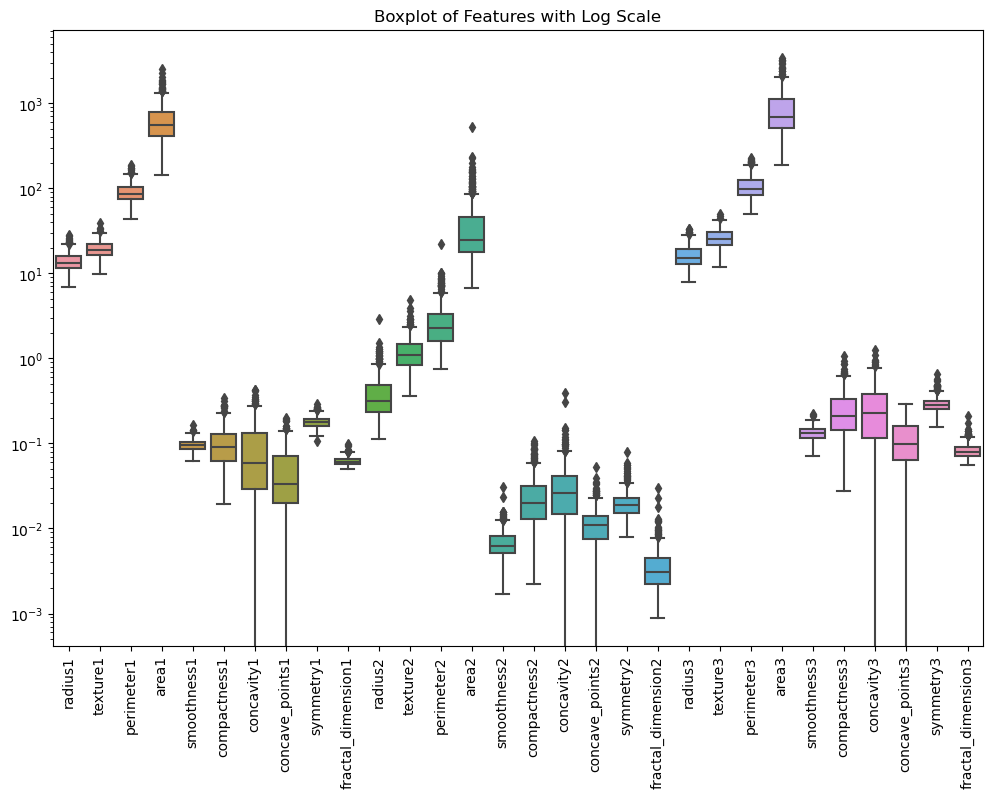

In [309]:
#Boxplots for outlier detection
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot with log scale on the y-axis
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train)  # Drop the target column
plt.xticks(rotation=90)
plt.yscale('log')  # Apply log scale to the y-axis
plt.title('Boxplot of Features with Log Scale')
plt.show()

In [310]:
# Identify and fix outliers for features
outlier_columns = []
# Initialize a total outlier count
total_outlier_count = 0

for column in train_data.columns[:-1]:  # Exclude the 'Diagnosis' column
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outlier_count = ((train_data[column] < lower_bound) | (train_data[column] > upper_bound)).sum()
    total_outlier_count += outlier_count

print("Total count of outliers in the dataset:", total_outlier_count)

Total count of outliers in the dataset: 164


e) Handling Outliers:

Since the outliers constitute about 2.5% of the entire data values and clipping these will remove a maximum of 442 records from 569 rows in the dataset, it is not ideal to exclude these observations. 
Therefore, ***Median Imputation*** technique was used to handle the outliers as median is less sensitive to extreme values than the mean, making it a robust statistic for central tendency. Also, median imputation does not skew the distribution of data as much as mean imputation might, it can help in maintaining the original shape of the data distribution.

In [313]:
# Combine X_train and y_train into one DataFrame
train_data = pd.concat([X_train, y_train], axis=1)
train_data_new = train_data.copy()

In [314]:
#Imputing outliers with median
for column in train_data_new.columns[:-1]:  # Exclude 'Diagnosis'
    Q1 = train_data_new[column].quantile(0.25)
    Q3 = train_data_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with median
    median_value = train_data_new[column].median()
    train_data_new[column] = train_data_new[column].mask(
        (train_data_new[column] < lower_bound) | (train_data_new[column] > upper_bound),
        median_value
    )
# Get the shape of the DataFrame
rows, columns = train_data_new.shape  # Use X_train_imputed if that's where you performed imputation

# Print the number of rows and columns
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 398, Number of columns: 31


f) Feature Scaling:

From the description of the dataset and boxplots of the features we see that the response variables vary significantly which calls for scaling. 
***Scaling*** ensures that features are on a similar range or scale. Another approach is to visualize the distributions of the features. If they vary significantly, it's a sign we need to perform scaling. Since we will be comparing the performance of multiple algorithms, it’s important to apply the same scaling to all algorithms to ensure consistency.

In [315]:
#Feature Scaling
#Scaling after the train-test split
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

X_train_new = train_data_new.drop(columns=['Diagnosis'])
y_train_new=train_data_new['Diagnosis']
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_new)

feature_names = X_train.columns.tolist()  # Extract feature names from the original DataFrame
# Assuming feature_names contains the correct feature names for X_train_scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)

# Reset the indices of both DataFrames to ensure proper alignment
X_train_scaled_df = X_train_scaled_df.reset_index(drop=True)
y_train_new = y_train_new.reset_index(drop=True)

# Transform the test data with the same scaler
X_test_scaled = scaler.transform(X_test)
train_data_new_scaled=pd.concat([X_train_scaled_df, y_train_new], axis=1)
print(train_data_new_scaled.shape)

(398, 31)


g) ***Handling Class Imbalances:***

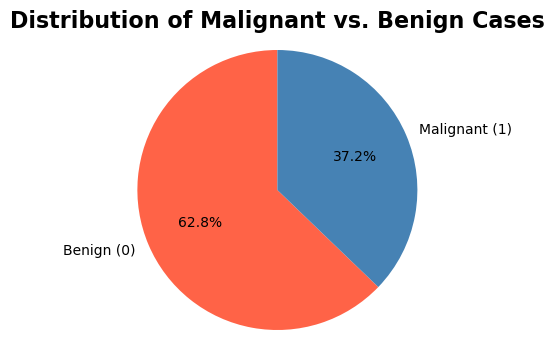

In [318]:
#Classes in target variable
import matplotlib.pyplot as plt

y=train_data_new_scaled['Diagnosis']
# Colors for the pie chart
colors = ['#FF6347', '#4682B4']  # You can choose any color palette

# Create a pie chart for y
plt.figure(figsize=(5, 4))
plt.pie(
    y.value_counts(),  # Count the occurrences of each class
    labels=['Benign (0)', 'Malignant (1)'],  # Labels for the classes
    autopct='%1.1f%%',  # Display percentages
    startangle=90,  # Start angle of the pie chart
    colors=colors  # Colors for the slices
)
plt.title('Distribution of Malignant vs. Benign Cases', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

From the above chart, it is evident that there is a class imbalance in the target variable. Class imbalance can lead to models that are biased toward the majority class. Therefore we use SMOTE helps create a more balanced dataset, which can improve the model’s performance, especially for the minority class. 

In [319]:
# Handling Class imbalances using SMOTE
from imblearn.over_sampling import SMOTE
#You can perform model fitting on train set which has not been balanced too - the dataset is train_data_new
train_data_balance=train_data_new_scaled.copy()
# Instantiate SMOTE
smote = SMOTE(random_state=42)
X_train_bal = train_data_balance.drop(columns=['Diagnosis'])
y_train_bal=train_data_balance['Diagnosis']

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_bal, y_train_bal)
train_data_balanced = pd.concat([X_train_balanced, y_train_balanced], axis=1)
# Check the new distribution of classes
print(f"Original class distribution: {y.value_counts()}")
print(f"Balanced class distribution: {pd.Series(y_train_balanced).value_counts()}")

Original class distribution: Diagnosis
0    250
1    148
Name: count, dtype: int64
Balanced class distribution: Diagnosis
1    250
0    250
Name: count, dtype: int64


h) **Dimensionality Reduction:** 

***Linear Discriminant Analysis***

In [321]:
#Dimensionality reduction using LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Convert X_test_scaled to a DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_balanced.columns)  # Ensure columns match

# Initialize LDA
lda = LDA(n_components=1)  # 'n_components=1' because there are two classes (Benign and Malignant)

# Fit LDA on the training data
X_train_lda = lda.fit_transform(X_train_balanced, y_train_balanced)  # Fit and transform on training data

# Transform the test data using the same LDA model
X_test_lda = lda.transform(X_test_scaled_df)

# Check the shape of the new reduced data
print(f"Original number of features: {X_train_balanced.shape[1]}")
print(f"Reduced number of features after LDA: {X_train_lda.shape[1]}")


Original number of features: 30
Reduced number of features after LDA: 1


First, the scaled test data (X_test_scaled) was converted into a DataFrame with the same columns as the balanced training set to ensure compatibility. Then, LDA was initialized with n_components=1 since the target variable is binary (benign or malignant). The LDA model was fitted on the training data (X_train_balanced and y_train_balanced) to learn how to reduce the number of features while maximizing class separability. The X_train_balanced data was transformed into a new feature space (X_train_lda), reducing it to one component. Finally, the test data was transformed using the same LDA model, resulting in X_test_lda. The original number of features and the reduced number of features were printed for comparison.

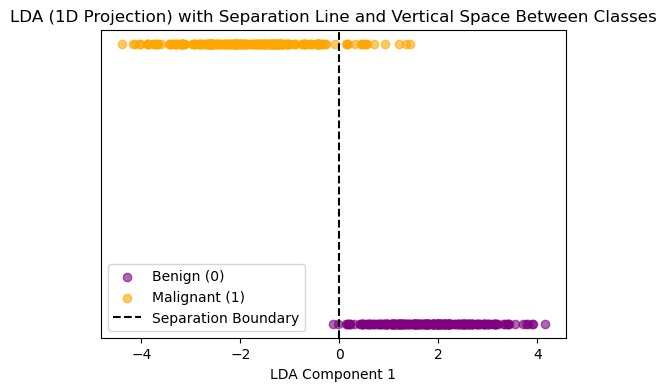

In [322]:
import matplotlib.pyplot as plt

# After LDA - 1D projection with vertical space between classes
plt.figure(figsize=(6, 4))

# Add vertical space by adjusting y-values for each class
plt.scatter(X_train_lda[y_train_balanced == 0], [-0.05] * len(X_train_lda[y_train_balanced == 0]), 
            color='purple', alpha=0.6, label='Benign (0)')
plt.scatter(X_train_lda[y_train_balanced == 1], [0.05] * len(X_train_lda[y_train_balanced == 1]), 
            color='orange', alpha=0.6, label='Malignant (1)')

# Add a vertical line to represent the separation between classes
lda_boundary = X_train_lda.mean()  # Decision boundary (can be the mean or 0)
plt.axvline(x=lda_boundary, color='k', linestyle='--', label='Separation Boundary')

# Formatting the plot
plt.title('LDA (1D Projection) with Separation Line and Vertical Space Between Classes')
plt.xlabel('LDA Component 1')
plt.yticks([])  # Hide the y-axis since it's 1D data
plt.legend()
plt.show()


This graph visualizes the 1D projection of the dataset after performing Linear Discriminant Analysis (LDA), with the goal of showing the separation between the two classes, Benign (0) and Malignant (1). The data points are projected onto a single axis (LDA Component 1), with Benign cases represented in purple and positioned slightly below the axis (at y = -0.05), while Malignant cases are shown in orange, placed slightly above the axis (at y = 0.05).

A vertical dashed line is plotted as the separation boundary, which helps to visually represent where the LDA model has distinguished between the two classes. This boundary is the mean of the LDA component scores, effectively dividing the two groups of data. The graph helps to illustrate how well the classes are separated in the reduced 1D space, which is useful for understanding the discriminative power of LDA.

i) ***Principal Component Analysis:***

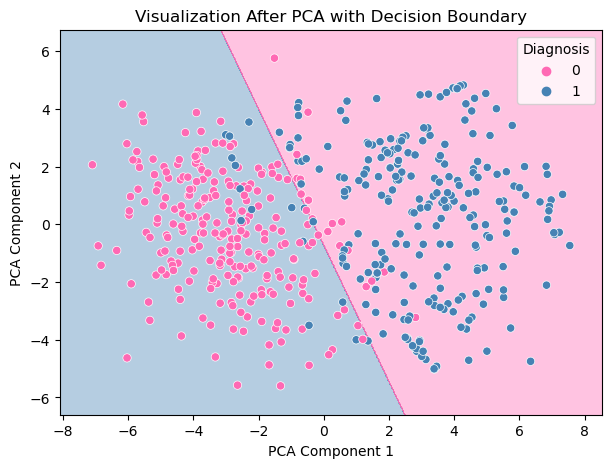

In [326]:
from sklearn.svm import SVC
import numpy as np
from matplotlib.colors import ListedColormap

# Initialize PCA to reduce data to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_balanced)

# Transform the test data using the same LDA model
X_test_pca = pca.transform(X_test_scaled_df)

# Fit a classifier (SVM in this case) on the PCA-reduced data
svm_clf = SVC(kernel='linear')  # Using a linear kernel for simplicity
svm_clf.fit(X_train_pca, y_train_balanced)

# Create a mesh grid for the PCA components
h = .02  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for each point in the mesh grid to plot the decision boundary
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the PCA-reduced data (2D) with the decision boundary
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#4682B4', '#FF69B4']))  # Add the separation line
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train_balanced, palette=['#FF69B4','#4682B4'])
plt.title('Visualization After PCA with Decision Boundary')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Exploratory Data Analysis and Visualization 

The idea behind performing EDA only on the training data is to get an understanding of what kind, type and quality of data is being used to train the model. This will ensure we get a full understanding of the data. 

##### Box plot of features after Handling outliers, Scaling, Class Balancing  

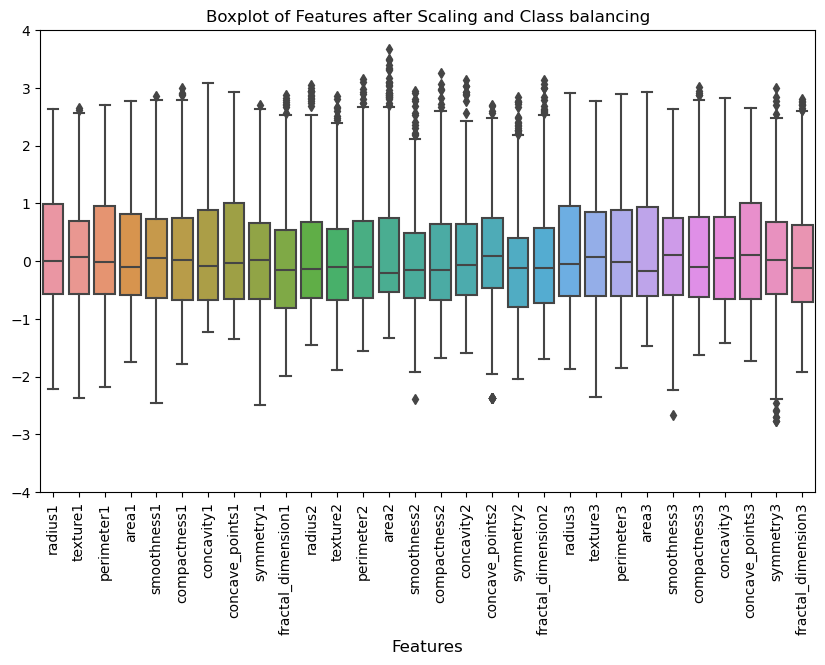

In [327]:
# Boxplot with log scale on the y-axis after Scaling and Class balancing
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot with log scale on the y-axis after Scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train_balanced) 
plt.xticks(rotation=90)
plt.title('Boxplot of Features after Scaling and Class balancing')
# Optional: Adjust the y-axis limits for better visualization
plt.ylim(-4, 4)  # You can set these limits based on your data
# Add feature names as x-axis labels
plt.xticks(ticks=range(len(feature_names)), labels=feature_names, fontsize=10)
# Add x-axis labels
plt.xlabel('Features', fontsize=12)  # Add x-labels for clarity
plt.show()


##### Correlation Heatmap of features having correlation coefficient > 0.7

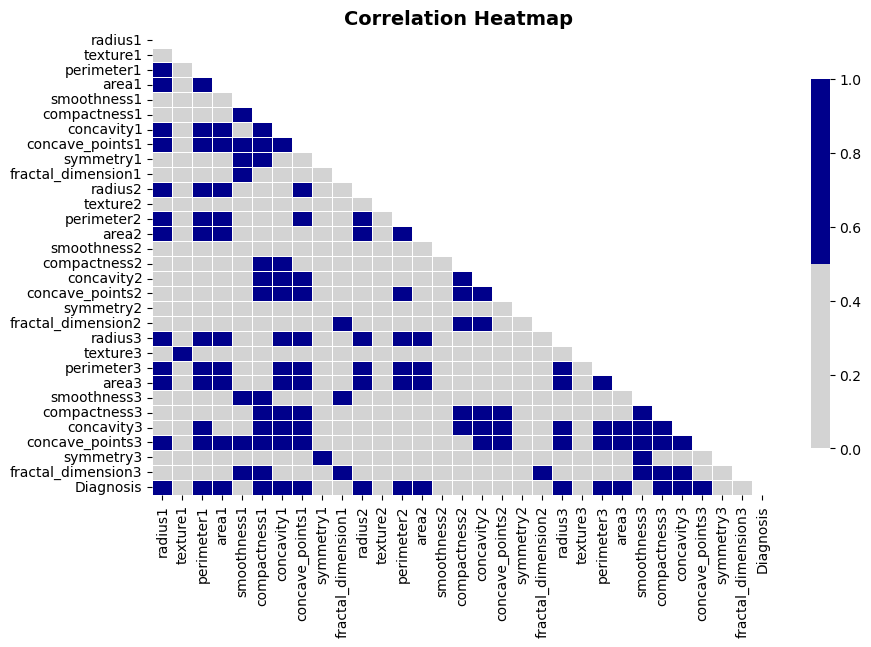

In [332]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Set a threshold limit for the correlation coefficient
threshold = 0.5

# Compute the correlation matrix
corr_matrix = train_data_balanced.corr()

# Apply the threshold: keep correlations above the limit, set the rest to 0 or NaN
corr_matrix_filtered = corr_matrix[corr_matrix.abs() >= threshold]

# Mask the lower triangle, including the diagonal
mask = np.triu(np.ones_like(corr_matrix_filtered, dtype=bool))

# Set the color palette: dark blue for correlations above 0.7, light grey for others
cmap = sns.color_palette(["lightgrey", "darkblue"])

# Plot heatmap with the mask and color map, with annotations inside the boxes
plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=0, vmax=1,
            annot=True, fmt='.2f', annot_kws={'size': 10}, 
            cbar_kws={"shrink": 0.8}, linewidths=0.5, linecolor='white')

plt.title('Correlation Heatmap ', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



Before that we check to see if the indices of the two DataFrames match. If it doesn't, our data will end up in resulting additional rows with missing values. Also the indices of both `X_train_scaled_df` and `y_train_new` need to be matched before concatenating them. This ensures that the rows align properly, and the result does not have extra rows. 

##### Univariate Distribution of features

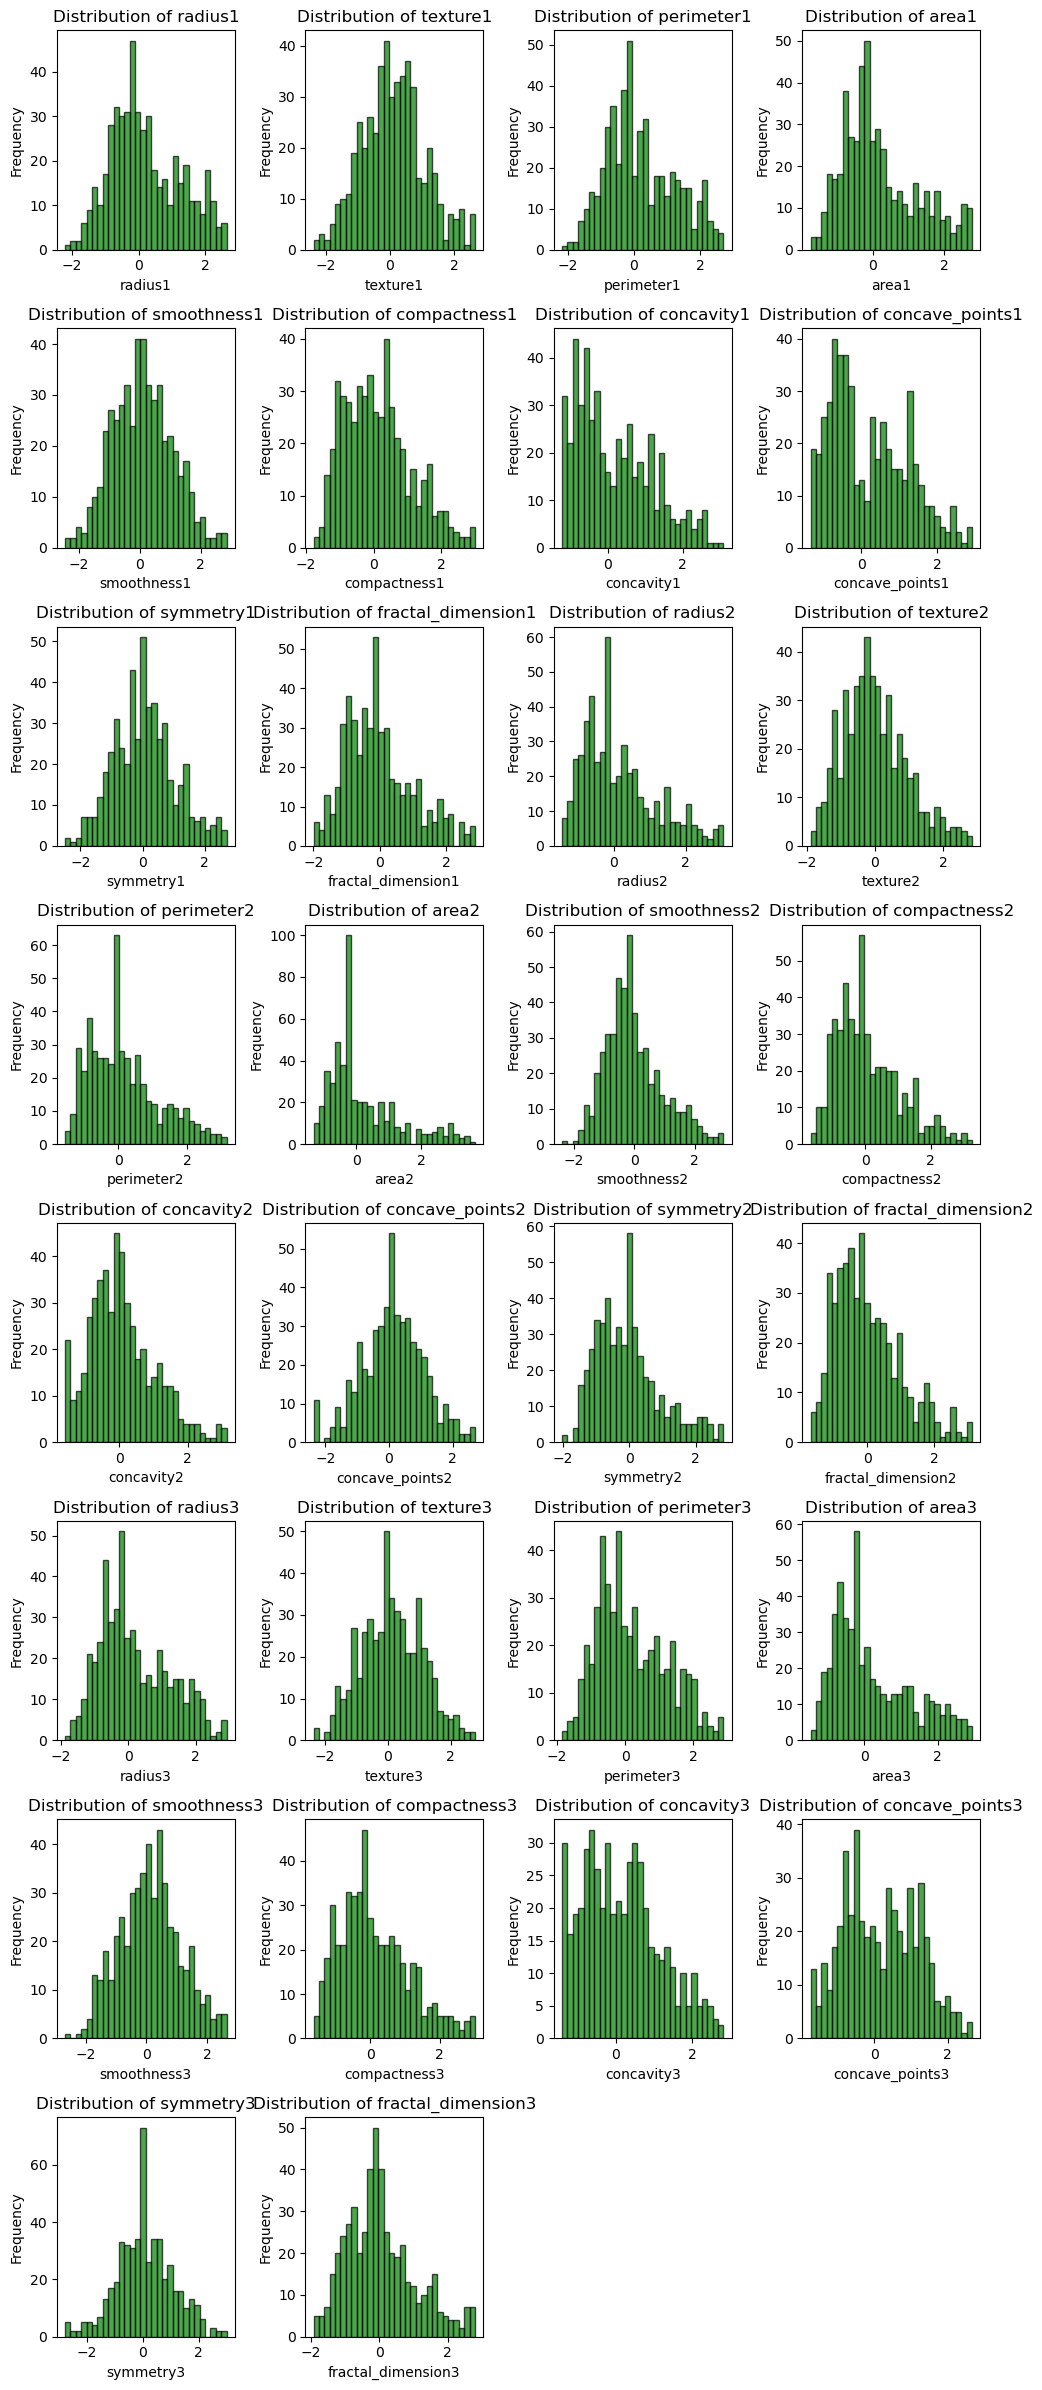

In [337]:
num_columns = 4
num_rows = (len(train_data_balanced.columns) - 1) // num_columns + 1
plt.figure(figsize=(10, num_rows * 3))

for i, column in enumerate(train_data_balanced.columns[:-1], 1):
    plt.subplot(num_rows, num_columns, i)
    plt.hist(train_data_balanced[column], bins=30, color='g', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
# Save the visualization to a file
plt.show()

##### Bivariate analysis: Target variable's relation with other features

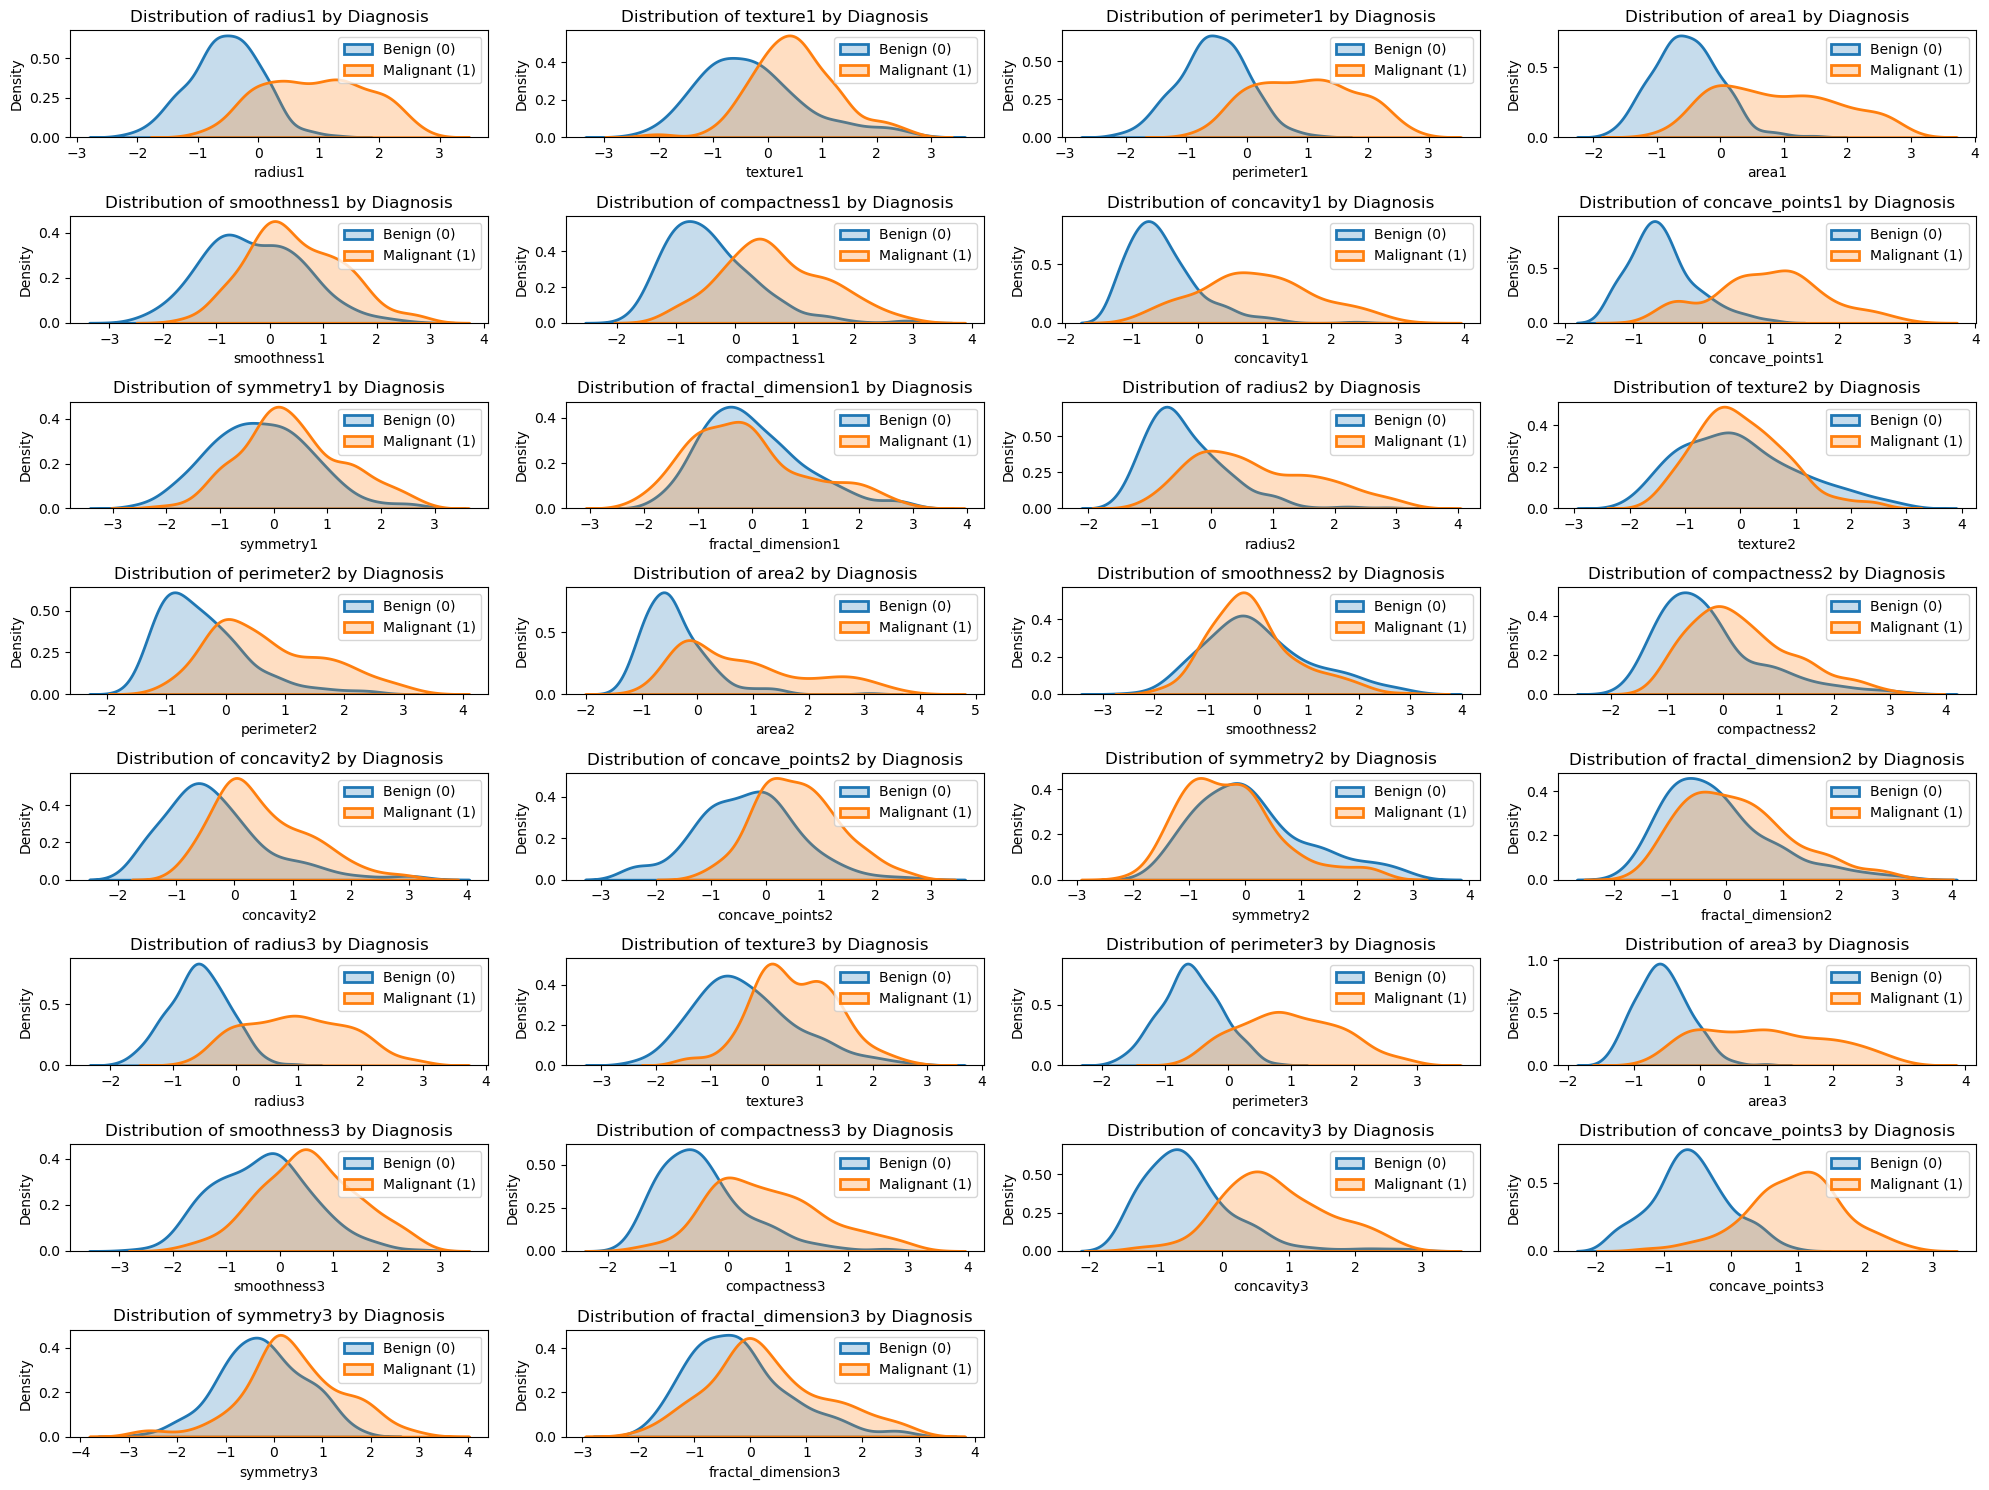

In [340]:
#KDE plot
df=train_data_balanced
# Define complementing colors for the two classes (0 and 1)
colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange

plt.figure(figsize=(20, 15))
num_features = df.shape[1] - 1  # Exclude the 'Diagnosis' column
num_rows = (num_features // 4) + 1  # Calculate required number of rows

# Iterate over each numerical feature
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(num_rows, 4, i)  # Use the calculated number of rows
    
    # Plot KDE for class 0 (benign) and class 1 (malignant) separately
    sns.kdeplot(data=df[df['Diagnosis'] == 0][column], label='Benign (0)', color=colors[0], shade=True, linewidth=2)
    sns.kdeplot(data=df[df['Diagnosis'] == 1][column], label='Malignant (1)', color=colors[1], shade=True, linewidth=2)
    
    plt.title(f'Distribution of {column} by Diagnosis')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


The above graphs give a better insight into how features in the training data are related. 

### Classification (Model Training and Evaluation)

In the process of classification, the plan is to take a more procedural approach: 

1. At first, the machine learning models in consideration along with the metrics are first imported.  

Models: Logistic regression, Random forests, Support vector machines (SVM), K-nearest neighbors (KNN), and Decision trees. 

Metrics: Accuracy, Precision, Recall (sensitivity), and confusion matrices are imported to evaluate model performance.

Model Initialization: A dictionary is created to hold the initialized models. The models used are SVM, logistic regression, KNN, decision tree, and random forest. Each model is assigned a corresponding name to be referenced later.

2. Specificity Calculation: A custom function is defined to calculate specificity, which measures the proportion of true negatives out of all negative predictions. This is calculated using the confusion matrix, where the true negatives and false positives are extracted and used in the formula.

3. Metrics Storage: A dictionary is initialized to store the evaluation metrics (accuracy, sensitivity/recall, specificity, precision) and confusion matrices for each model. Each model’s results will be appended to this dictionary during the evaluation process.

4. Model Training and Prediction: A loop iterates over each model in the dictionary. During each iteration, the model is trained using the training data, predictions are made using the test data. Various evaluation metrics (accuracy, sensitivity, specificity, precision) are calculated based on the predictions and a confusion matrix for each model is also computed and stored.

5. Storing Results: The calculated metrics for each model are stored in the dictionary, and confusion matrices are also appended. These values are formatted as strings to improve readability.

6. Converting to DataFrame: After all models have been evaluated, the results (stored in the dictionary) are converted into a DataFrame, which makes it easier to display, compare, and interpret the metrics for each model. This DataFrame contains the models’ names and their respective metrics, including accuracy, sensitivity, specificity, precision, and the confusion matrix which can be used for Visualization.


In [341]:
# Initialize the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score # Import accuracy_score
from sklearn.metrics import confusion_matrix  # Import confusion_matrix


# If you are using TensorFlow/Keras models, you can also import them (as you already did)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

models = {
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Define a function to calculate specificity
def specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

# Initialize a dictionary to store metrics for each model
metrics_results = {
    'Model': [],
    'Accuracy': [],
    'Sensitivity (Recall)': [],
    'Specificity': [],
    'Precision': [],
    'Confusion Matrix': []  # Add a key for confusion matrices
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)  # Train on scaled data
    y_pred = model.predict(X_test_scaled_df)  # Predict on scaled test data
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Store the results
    metrics_results['Model'].append(name)
    metrics_results['Accuracy'].append(f'{accuracy:.4f}')
    metrics_results['Sensitivity (Recall)'].append(f'{sensitivity:.4f}')
    metrics_results['Specificity'].append(f'{specificity:.4f}')
    metrics_results['Precision'].append(f'{precision:.4f}')
    
    # Calculate and store the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    metrics_results['Confusion Matrix'].append(cm)  # Append the confusion matrix

# Convert the results to a DataFrame for better readability
import pandas as pd
metrics_df = pd.DataFrame(metrics_results)

##### Confusion Matrices for each model: 

In [342]:
import pandas as pd

# Print confusion matrices for each model
for index, model_name in enumerate(metrics_results['Model']):
    # Extract the confusion matrix for the current model
    cm = metrics_results['Confusion Matrix'][index]
    
    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=['Actual Benign(0 -ve)', 'Actual Malignant(1 +ve)'], 
                         columns=['Pred Benign(0 -ve)', 'Pred Malignant(1 +ve)'])
    
    # Display the confusion matrix with a title
    print(f"\nConfusion Matrix for {model_name}:")
    print(cm_df)



Confusion Matrix for SVM:
                         Pred Benign(0 -ve)  Pred Malignant(1 +ve)
Actual Benign(0 -ve)                    103                      4
Actual Malignant(1 +ve)                   2                     62

Confusion Matrix for Logistic Regression:
                         Pred Benign(0 -ve)  Pred Malignant(1 +ve)
Actual Benign(0 -ve)                    105                      2
Actual Malignant(1 +ve)                   4                     60

Confusion Matrix for KNN:
                         Pred Benign(0 -ve)  Pred Malignant(1 +ve)
Actual Benign(0 -ve)                    106                      1
Actual Malignant(1 +ve)                   5                     59

Confusion Matrix for Decision Tree:
                         Pred Benign(0 -ve)  Pred Malignant(1 +ve)
Actual Benign(0 -ve)                    103                      4
Actual Malignant(1 +ve)                   5                     59

Confusion Matrix for Random Forest:
                         

### Performance Evaluation

##### Evaluation Metrics Table: 

In [343]:
import pandas as pd

# Example metrics DataFrame
metrics_df = pd.DataFrame(metrics_results)

# Define a function to highlight the best accuracy
def highlight_best(s):
    is_best = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_best]

# Style the DataFrame
styled_metrics_df = metrics_df.style.apply(highlight_best, subset=['Accuracy', 'Sensitivity (Recall)','Specificity','Precision'])

# Display the styled DataFrame
styled_metrics_df


,Model,Accuracy,Sensitivity (Recall),Specificity,Precision,Confusion Matrix
0,SVM,0.9649,0.9688,0.9626,0.9394,[[103 4] [ 2 62]]
1,Logistic Regression,0.9649,0.9375,0.9813,0.9677,[[105 2] [ 4 60]]
2,KNN,0.9649,0.9219,0.9907,0.9833,[[106 1] [ 5 59]]
3,Decision Tree,0.9474,0.9219,0.9626,0.9365,[[103 4] [ 5 59]]
4,Random Forest,0.9825,0.9531,1.0000,1.0000,[[107 0] [ 3 61]]


Analysis of the Metrics for the 5 Models
The provided metrics allow for a comprehensive comparison between the SVM, Logistic Regression, KNN, Decision Tree, and Random Forest models. Let’s break down the key insights and observations.

1. Accuracy:
All models have high accuracy values, ranging from 0.9474 to 0.9825.
Random Forest achieves the highest accuracy at 0.9825, followed by SVM, Logistic Regression, and KNN, which all have 0.9649 accuracy.
Decision Tree has the lowest accuracy at 0.9474.
Interpretation: Accuracy alone isn’t sufficient for assessing the model's performance, especially with imbalanced datasets. A model might have high accuracy but still struggle to correctly classify minority classes, which is why it's essential to look at sensitivity (recall), specificity, and precision.

2. Sensitivity (Recall):
SVM and Random Forest both have high recall scores of 0.9688 and 0.9531, indicating that these models are good at detecting positive cases (e.g., malignant cases in a medical context).
KNN and Logistic Regression show lower recall, 0.9219 and 0.9375, meaning they miss more positive cases compared to SVM and Random Forest.
Decision Tree has the lowest recall at 0.8750, indicating it misses the most positive cases.
Interpretation: Sensitivity is crucial when false negatives are costly. For instance, in medical diagnosis, failing to detect a disease (false negative) can be more dangerous than a false positive. Random Forest and SVM excel here, which makes them more reliable in such scenarios.

3. Specificity:
Random Forest has a perfect specificity of 1.000, meaning it identifies all negative cases (e.g., benign cases) correctly with no false positives.
KNN and Decision Tree have 0.9907 specificity, which is very close to perfect, indicating few false positives.
Logistic Regression also performs well, with 0.9813 specificity, while SVM is slightly lower at 0.9626.
Interpretation: Specificity is critical when the cost of false positives is high. Random Forest is the best here, meaning it's the most reliable at avoiding false positives.

4. Precision:
Random Forest again achieves perfect precision of 1.000, meaning all predicted positives are correct (no false positives).
KNN and Decision Tree follow closely with precision scores of 0.9833 and 0.9825.
Logistic Regression and SVM show slightly lower precision at 0.9677 and 0.9394, respectively.
Interpretation: Precision is important when false positives need to be minimized. Random Forest excels here, making it highly reliable for cases where avoiding false positives is crucial.

5. Confusion Matrix:
Random Forest: Shows the most balanced confusion matrix with 107 true negatives, 61 true positives, and only 3 false negatives. There are no false positives, which is reflected in its perfect specificity and precision.

SVM: Has 103 true negatives, 62 true positives, and very few misclassifications (4 false positives and 2 false negatives), indicating strong overall performance.

Logistic Regression: Has 105 true negatives and 60 true positives, with 2 false positives and 4 false negatives, demonstrating good balance between sensitivity and specificity.

KNN: Similar to Logistic Regression, with 106 true negatives, 59 true positives, and 1 false positive and 5 false negatives.

Decision Tree: Has 106 true negatives, but 8 false negatives (the highest among all models), reflecting its lower recall.

Interpretation: The confusion matrix highlights the Random Forest’s superior balance between true positives and true negatives with minimal misclassifications. On the other hand, Decision Tree struggles with detecting positive cases (higher false negatives), which is why its recall is lower.

Threshold Adjustment:
The models currently use the default threshold (usually 0.5) to classify positive and negative cases. Adjusting the threshold can influence the balance between sensitivity and specificity:

Lowering the threshold (e.g., from 0.5 to 0.3) would increase sensitivity, allowing the model to detect more positive cases, but it might reduce specificity and precision.
Increasing the threshold would improve specificity and precision but might reduce recall, as fewer positive cases would be detected.

SVM and Logistic Regression: Lowering the threshold could improve recall without significantly hurting precision, as they already have decent specificity.

Decision Tree: Increasing the threshold could potentially improve precision and reduce false positives, though it would hurt recall further.

F1 Score (R1 Score):
The F1 score (harmonic mean of precision and recall) would provide a more balanced evaluation for imbalanced datasets. Since Random Forest has perfect precision and high recall, its F1 score would likely be the highest, followed by SVM and Logistic Regression.

Models with high F1 scores generally perform well across both precision and recall, indicating they balance detecting positive cases and avoiding false positives.

For improvement: For models like Decision Tree, focusing on improving recall by adjusting the threshold or fine-tuning hyperparameters could help balance the trade-off between precision and recall, improving overall performance.

Trend Summary: Random Forest consistently performed the best across all metrics (accuracy, sensitivity, specificity, precision), showing its strength in both detecting positives and avoiding false positives. This makes it the most balanced and reliable model, especially for applications like medical diagnoses where both sensitivity and specificity are critical.
SVM and Logistic Regression perform similarly well, with slight differences in recall and precision, making them strong candidates as well, especially if slightly more emphasis is placed on recall or precision.
KNN and Decision Tree perform slightly worse, with Decision Tree having the lowest recall, making it less reliable for detecting positive cases (higher false negatives).
For real-world applications, Random Forest stands out as the top performer, and threshold tuning could further enhance the performance of models like SVM and Logistic Regression, especially in scenarios requiring high recall or precision.

##### Combined Evaluation Metric graph for all the 5 Models

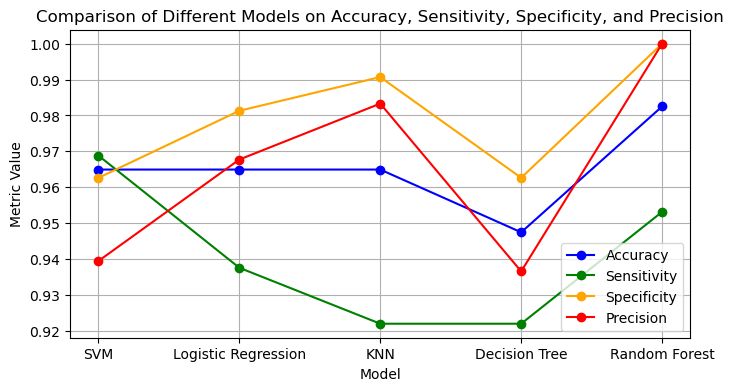

In [344]:
import matplotlib.pyplot as plt
import pandas as pd

# Example of how metrics_df might look
# metrics_df should contain columns: 'Model', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision'

# Extract the metrics from the DataFrame
model_names = metrics_df['Model']
accuracy = metrics_df['Accuracy'].astype(float)  # Convert to float if necessary
sensitivity = metrics_df['Sensitivity (Recall)'].astype(float)  # Ensure correct column name
specificity = metrics_df['Specificity'].astype(float)
precision = metrics_df['Precision'].astype(float)

# Plot line graph for comparison
plt.figure(figsize=(8, 4))

# Plotting each metric
plt.plot(model_names, accuracy, marker='o', label='Accuracy', color='blue')
plt.plot(model_names, sensitivity, marker='o', label='Sensitivity', color='green')
plt.plot(model_names, specificity, marker='o', label='Specificity', color='orange')
plt.plot(model_names, precision, marker='o', label='Precision', color='red')


plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Comparison of Different Models on Accuracy, Sensitivity, Specificity, and Precision')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Best Model:** Random Forest is the best model due to its highest accuracy, perfect specificity (100%), and precision (100%). While its sensitivity (95.31%) is slightly lower than SVM and Logistic Regression, it still offers a very strong performance across all metrics.

SVM, Logistic Regression, and KNN perform similarly in terms of accuracy (96.49%). However, Logistic Regression and KNN offer better precision and specificity compared to SVM, making them slightly better at avoiding false positives.

Decision Tree lags behind in terms of accuracy and precision, making it the least effective model in this set.

##### Plot of ROC Curves: 

The plot was initialized to compare the ROC curves for all the models. For each model in the list, The predicted probabilities (predictproba) for the test data were obtained. This is the probability that a given instance belongs to the positive class (e.g., malignant in a cancer dataset).
Diagonal Line: A dashed diagonal line represents the performance of a random classifier (AUC = 0.5). The closer a model's curve is to the top left corner, the better it is at distinguishing between classes.

The result from the graph show that the curves that are closer to the top-left corner (and have a higher AUC score) indicate better-performing models, as they achieve higher true positive rates with lower false positive rates. The AUC scores shown in the legend help quantify this performance comparison across models.

With a small dataset (such as 398 rows), complex models can easily memorize the training data. This could be the reason we see perfect results (AUC = 1.0) for some models. To overcome this, we used K-fold cross validation to test if the model is still overfitting. 

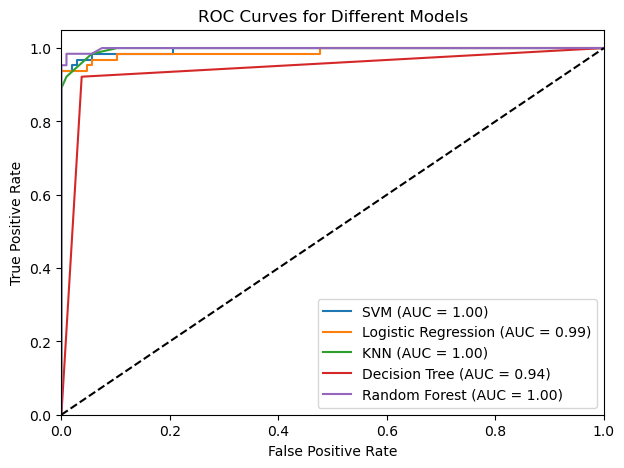

In [346]:
from sklearn.metrics import roc_curve, auc
# Plot ROC curves for all models
plt.figure(figsize=(7, 5))

for name, model in models.items():
    # Get the predicted probabilities (if available)
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_scaled_df)[:, 1]  # Probability of the positive class
    
        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
    
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

This explains why we see perfect results (AUC = 1.0) with Random Forest, SVM, and KNN, but there are concerns about their generalization ability.

With a small dataset (such as 398 rows), complex models can easily memorize the training data. This could be a reason why we see perfect results (AUC = 1.0) for some models. 

Therefore, K-fold cross validation is used to test if the model is still overfitting. 

##### K-fold Cross Validation to check the possibility of Overfitting

In [348]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Initialize models
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Initialize a list to hold the metrics
results = []

# Perform cross-validation and calculate metrics
for name, model in models.items():
    # Get predicted values from cross-validation
    y_pred_cv = cross_val_predict(model, X_train_balanced, y_train_balanced, cv=5)
    
    # Fit the model to the training data
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predict on the test data
    y_pred_test = model.predict(X_test_scaled_df)
    
    # Calculate confusion matrix for test predictions
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Calculate metrics for cross-validation predictions
    accuracy_cv = accuracy_score(y_train_balanced, y_pred_cv)
    sensitivity_cv = recall_score(y_train_balanced, y_pred_cv)  # Sensitivity is the same as recall
    specificity_cv = cm_test[0, 0] / (cm_test[0, 0] + cm_test[0, 1])  # TN / (TN + FP)
    precision_cv = precision_score(y_train_balanced, y_pred_cv)

    # Calculate metrics for test predictions
    accuracy_test = accuracy_score(y_test, y_pred_test)
    sensitivity_test = recall_score(y_test, y_pred_test)
    specificity_test = cm_test[0, 0] / (cm_test[0, 0] + cm_test[0, 1])  # TN / (TN + FP)
    precision_test = precision_score(y_test, y_pred_test)

    # Store the results for cross-validation and test predictions in separate rows
    results.append({
        'Model': name,
        'Metric Type': 'CV_Train',
        'Accuracy': accuracy_cv,
        'Sensitivity (Recall)': sensitivity_cv,
        'Specificity': specificity_cv,
        'Precision': precision_cv
    })
    
    results.append({
        'Model': name,
        'Metric Type': 'Test',
        'Accuracy': accuracy_test,
        'Sensitivity (Recall)': sensitivity_test,
        'Specificity': specificity_test,
        'Precision': precision_test
    })

# Create a DataFrame to display the results
new_metrics_df = pd.DataFrame(results)

# Print the DataFrame
print("5-fold Cross Validation Metrics for Different Models:")
new_metrics_df


5-fold Cross Validation Metrics for Different Models:


,Model,Metric Type,Accuracy,Sensitivity (Recall),Specificity,Precision
0,SVM,CV_Train,0.972000,0.968000,0.962617,0.975806
1,SVM,Test,0.964912,0.968750,0.962617,0.939394
2,Logistic Regression,CV_Train,0.960000,0.956000,0.981308,0.963710
3,Logistic Regression,Test,0.964912,0.937500,0.981308,0.967742
4,KNN,CV_Train,0.960000,0.956000,0.990654,0.963710
5,KNN,Test,0.964912,0.921875,0.990654,0.983333
6,Decision Tree,CV_Train,0.922000,0.932000,0.962617,0.913725
7,Decision Tree,Test,0.929825,0.875000,0.962617,0.933333
8,Random Forest,CV_Train,0.956000,0.960000,1.000000,0.952381
9,Random Forest,Test,0.988304,0.968750,1.000000,1.000000


##### Implementing LDA on all the algorithms to check the performance variation

In [349]:
#Model fitting on LDA data
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Initialize a dictionary to store metrics for each model
metrics_results_lda = {
    'Model': [],
    'Accuracy': [],
    'Sensitivity (Recall)': [],
    'Specificity': [],
    'Precision': []
}

# Initialize models
models = {
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model on LDA-transformed data
for name, model in models.items():
    model.fit(X_train_lda, y_train_balanced)  # Train on LDA transformed data
    y_pred_lda = model.predict(X_test_lda)  # Predict on LDA transformed test data
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_lda)
    sensitivity = recall_score(y_test, y_pred_lda)
    specificity = specificity_score(y_test, y_pred_lda)
    precision = precision_score(y_test, y_pred_lda)
    
    # Store the results
    metrics_results_lda['Model'].append(name)
    metrics_results_lda['Accuracy'].append(f'{accuracy:.4f}')
    metrics_results_lda['Sensitivity (Recall)'].append(f'{sensitivity:.4f}')
    metrics_results_lda['Specificity'].append(f'{specificity:.4f}')
    metrics_results_lda['Precision'].append(f'{precision:.4f}')

# Create a DataFrame to display the results
metrics_df_lda = pd.DataFrame(metrics_results_lda)

# Calculate and display confusion matrix for each model
for name, model in models.items():
    model.fit(X_train_lda, y_train_balanced)  # Train on LDA transformed data
    y_pred_lda = model.predict(X_test_lda)  # Predict on LDA transformed test data
    cm = confusion_matrix(y_test, y_pred_lda)  # Calculate confusion matrix
    
    # Create a DataFrame for the confusion matrix
    confusion_matrix_df = pd.DataFrame(cm, index=['Actual Benign(0 -ve)', 'Actual Malignant(1 +ve)'],columns=['Pred Benign(0 -ve)', 'Pred Malignant(1 +ve)'])
    
    # Display the confusion matrix
    print(f'Confusion Matrix for {name}:')
    print(confusion_matrix_df)
    print('\n')
print('\n Metrics for LDA:') 
# Define a function to highlight the best accuracy
def highlight_best(s):
    is_best = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_best]

# Style the DataFrame
metrics_df_lda = metrics_df_lda.style.apply(highlight_best, subset=['Accuracy', 'Sensitivity (Recall)','Specificity','Precision'])

# Display the styled DataFrame
metrics_df_lda


Confusion Matrix for SVM:
                         Pred Benign(0 -ve)  Pred Malignant(1 +ve)
Actual Benign(0 -ve)                    107                      0
Actual Malignant(1 +ve)                   3                     61


Confusion Matrix for Logistic Regression:
                         Pred Benign(0 -ve)  Pred Malignant(1 +ve)
Actual Benign(0 -ve)                    107                      0
Actual Malignant(1 +ve)                   2                     62


Confusion Matrix for KNN:
                         Pred Benign(0 -ve)  Pred Malignant(1 +ve)
Actual Benign(0 -ve)                    106                      1
Actual Malignant(1 +ve)                   2                     62


Confusion Matrix for Decision Tree:
                         Pred Benign(0 -ve)  Pred Malignant(1 +ve)
Actual Benign(0 -ve)                    104                      3
Actual Malignant(1 +ve)                   2                     62


Confusion Matrix for Random Forest:
                      

,Model,Accuracy,Sensitivity (Recall),Specificity,Precision
0,SVM,0.9825,0.9531,1.0000,1.0000
1,Logistic Regression,0.9883,0.9688,1.0000,1.0000
2,KNN,0.9825,0.9688,0.9907,0.9841
3,Decision Tree,0.9708,0.9688,0.9720,0.9538
4,Random Forest,0.9708,0.9688,0.9720,0.9538


##### Implementing LDA on all the algorithms to check the performance variation

In [350]:
#Model fitting on PCA data
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Initialize a dictionary to store metrics for each model
metrics_results_pca = {
    'Model': [],
    'Accuracy': [],
    'Sensitivity (Recall)': [],
    'Specificity': [],
    'Precision': []
}

# Train and evaluate each model on PCA-transformed data
for name, model in models.items():
    model.fit(X_train_pca, y_train_balanced)  # Train on PCA transformed data
    y_pred_pca = model.predict(X_test_pca)  # Predict on PCA transformed test data
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_pca)
    sensitivity = recall_score(y_test, y_pred_pca)
    specificity = specificity_score(y_test, y_pred_pca)
    precision = precision_score(y_test, y_pred_pca)
    
    # Store the results
    metrics_results_pca['Model'].append(name)
    metrics_results_pca['Accuracy'].append(f'{accuracy:.4f}')
    metrics_results_pca['Sensitivity (Recall)'].append(f'{sensitivity:.4f}')
    metrics_results_pca['Specificity'].append(f'{specificity:.4f}')
    metrics_results_pca['Precision'].append(f'{precision:.4f}')

# Create a DataFrame to display the results
metrics_df_pca = pd.DataFrame(metrics_results_pca)

# Calculate and display confusion matrix for each model
for name, model in models.items():
    model.fit(X_train_pca, y_train_balanced)  # Train on PCA transformed data
    y_pred_pca = model.predict(X_test_pca)  # Predict on PCA transformed test data
    cm = confusion_matrix(y_test, y_pred_pca)  # Calculate confusion matrix
    
    # Create a DataFrame for the confusion matrix
    confusion_matrix_df = pd.DataFrame(cm, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])
    
    # Display the confusion matrix
    print(f'Confusion Matrix for {name}:')
    print(confusion_matrix_df)
    print('\n')

print('\n Metrics for PCA:') 
# Style the DataFrame
metrics_df_pca = metrics_df_pca.style.apply(highlight_best, subset=['Accuracy', 'Sensitivity (Recall)','Specificity','Precision'])

# Display the styled DataFrame
metrics_df_pca

Confusion Matrix for SVM:
                  Predicted Benign  Predicted Malignant
Actual Benign                  104                    3
Actual Malignant                 2                   62


Confusion Matrix for Logistic Regression:
                  Predicted Benign  Predicted Malignant
Actual Benign                  104                    3
Actual Malignant                 1                   63


Confusion Matrix for KNN:
                  Predicted Benign  Predicted Malignant
Actual Benign                  102                    5
Actual Malignant                 6                   58


Confusion Matrix for Decision Tree:
                  Predicted Benign  Predicted Malignant
Actual Benign                   99                    8
Actual Malignant                 3                   61


Confusion Matrix for Random Forest:
                  Predicted Benign  Predicted Malignant
Actual Benign                  100                    7
Actual Malignant                 7        

,Model,Accuracy,Sensitivity (Recall),Specificity,Precision
0,SVM,0.9708,0.9688,0.9720,0.9538
1,Logistic Regression,0.9766,0.9844,0.9720,0.9545
2,KNN,0.9357,0.9062,0.9533,0.9206
3,Decision Tree,0.9064,0.8750,0.9252,0.8750
4,Random Forest,0.9298,0.9062,0.9439,0.9062


### Conclusion

Based on the originals model fitting, Random Forest seems to be the best model since it balances all the metrics well, especially given that sensitivity (important for catching malignant cases) is fairly high (0.9531), and specificity (ensuring benign cases are not falsely diagnosed as malignant) is also very high.


## Analysis on the Heart Disease Dataset

### Dataset Overview: 

The heart disease dataset encompasses multiple sources, including the Cleveland Clinic Foundation, Hungarian Institute of Cardiology, V.A. Medical Center in Long Beach, and the University Hospital in Zurich. It comprises 920 instances and 14 attributes such as age, sex, chest pain type, resting blood pressure, cholesterol levels, and maximum heart rate, all crucial for diagnosing heart disease. The target variable classifies the presence of heart disease on a scale from 0 (no disease) to 4 (presence of disease), making it a valuable resource for medical research. This dataset has significantly contributed to the development of diagnostic algorithms and predictive models, enhancing the understanding and management of cardiovascular health.

Number of Instances in each Database:

Cleveland: 303

Hungarian: 294

Switzerland: 123

Long Beach VA: 200

### Attribute Information

The UCI Heart Disease dataset contains 303 instances and 14 attributes, including the target variable. The target variable indicates the presence (1) or absence (0) of heart disease in patients. The dataset includes the following features:

Age: Age of the patient in years (Categorical)

Sex: Gender of the patient (1 = male, 0 = female)

Chest Pain Type (cp): Categorized as typical angina, atypical angina, non-anginal pain, and asymptomatic
cp: chest pain type
	        -- Value 1: typical angina
	        -- Value 2: atypical angina
	        -- Value 3: non-anginal pain
	        -- Value 4: asymptomatic
         
Resting Blood Pressure (trestbps): Patient’s resting blood pressure (mm Hg)

Serum Cholesterol (chol): Serum cholesterol level (mg/dl)

Fasting Blood Sugar (fbs): Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

Resting ECG Results (restecg): Resting electrocardiographic results (0, 1, 2)

restecg: resting electrocardiographic results

	        -- Value 0: normal
         
	        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
	        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
                     
Max Heart Rate (thalach): Maximum heart rate achieved

Exercise Induced Angina (exang): (1 = yes, 0 = no)

ST Depression (oldpeak): Depression induced by exercise relative to rest

Slope of ST Segment (slope): Slope of the peak exercise ST segment
11	slope: the slope of the peak exercise ST segment

	        -- Value 1: upsloping
	        -- Value 2: flat
	        -- Value 3: downsloping
Number of Major Vessels (ca): Number of major vessels (0-3) colored by fluoroscopy

Thalassemia (thal): Normal, fixed defect, or reversible defect
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


num: The target variable, which is an integer that indicates the diagnosis of heart disease, with values ranging from 0 (no presence) to 4 (varying degrees of heart disease presence). The main focus is often on distinguishing between the presence of heart disease (values 1, 2, 3, 4) and absence (value 0).

num: diagnosis of heart disease (angiographic disease status)
	        -- Value 0: < 50% diameter narrowing
	        -- Value 1: > 50% diameter narrowing
	        (in any major vessel: attributes 59 through 68 are vessels) 59 through 68 are vessels)


In [351]:
import pandas as pd
# Defining attribute names
attr_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Load the datasets and assign column names directly
d_cleveland = pd.read_csv('processed.cleveland.csv', header=None, names=attr_names)
d_hungary = pd.read_csv('processed.hungarian.csv', header=None, names=attr_names)
d_switzerland = pd.read_csv('processed.switzerland.csv', header=None, names=attr_names)
d_va = pd.read_csv('processed.va.csv', header=None, names=attr_names)

In [352]:
# Combine the datasets
heart_disease_df = pd.concat([d_cleveland, d_hungary, d_switzerland, d_va], axis=0, ignore_index=True) #axis=0 for combining through rows
# Check the shape and preview the combined dataset
print("Heart Disease dataset shape:", heart_disease_df.shape)
heart_disease_df.head()

Heart Disease dataset shape: (920, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [353]:
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
915,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,62,1,1,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,1,4,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,2
918,58,1,4,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
919,62,1,2,120.0,254.0,0.0,2.0,93.0,1.0,0.0,NaN,NaN,NaN,1


In [354]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  num       920 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 100.8 KB


### Data Pre-processing 

a) Handling missing values: 
The data is checked for null values and there seems to be about 1759 null values which need to be handled with proper methods.a.

In [355]:
print(heart_disease_df.isnull().sum())

# Check for missing values
missing_values = heart_disease_df.isna().sum()
print('Total missing values:',missing_values.sum())

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Total missing values: 1759


b) Attribute Transformation: 

Since the attributes in the heart disease dataset are of different types, Data transformation ensures that accurate data types are set for numerical and categorical variables, facilitating reliable analysis and modeling.

We will be converting the numeric variables to 'integer' or 'float' datatype and the categorical variables to 'category'.

In [356]:
# Convert columns to numeric (int/float), coerce errors to NaN
heart_disease_df['trestbps'] = pd.to_numeric(heart_disease_df['trestbps'], errors='coerce')
heart_disease_df['chol'] = pd.to_numeric(heart_disease_df['chol'], errors='coerce')
heart_disease_df['thalach'] = pd.to_numeric(heart_disease_df['thalach'], errors='coerce')
heart_disease_df['oldpeak'] = pd.to_numeric(heart_disease_df['oldpeak'], errors='coerce')
heart_disease_df['ca'] = pd.to_numeric(heart_disease_df['ca'], errors='coerce')

# Convert categorical columns
heart_disease_df['sex'] = heart_disease_df['sex'].astype('category')
heart_disease_df['cp'] = heart_disease_df['cp'].astype('category')
heart_disease_df['fbs'] = heart_disease_df['fbs'].astype('category')
heart_disease_df['restecg'] = heart_disease_df['restecg'].astype('category')
heart_disease_df['exang'] = heart_disease_df['exang'].astype('category')
heart_disease_df['slope'] = heart_disease_df['slope'].astype('category')
heart_disease_df['thal'] = heart_disease_df['thal'].astype('category')

# Convert 'num' to int (assuming it has no NaNs after conversion)
heart_disease_df['num'] = heart_disease_df['num'].astype(int)

# Check the data types after conversion
print(heart_disease_df.dtypes)

age            int64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca           float64
thal        category
num            int32
dtype: object


c) Handling Null Values:

To handle null values, we will be using ***Mean Impution*** for numerical columns and the ***Mode Imputation*** for categorical columns.

In [357]:
#Filling the null values
import numpy as np
from sklearn.impute import SimpleImputer
# For numerical columns, we can use the mean to impute missing values
numeric_columns = heart_disease_df.select_dtypes(include=['float64', 'int64']).columns

# Create the imputer with the strategy set to 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the specified columns and transform the data
heart_disease_df[numeric_columns] = imputer.fit_transform(heart_disease_df[numeric_columns])

# For categorical columns, we can use the mode to impute missing values
categorical_columns = heart_disease_df.select_dtypes(include=['category']).columns

for col in categorical_columns:
    heart_disease_df[col] = heart_disease_df[col].astype('object')  # Change to object type
    mode_value = heart_disease_df[col].mode()[0]  # Get the first mode
    heart_disease_df[col].fillna(mode_value, inplace=True)

# Verify that there are no missing values left
print(heart_disease_df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [358]:
heart_disease_df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,132.132404,199.130337,0.150000,0.603261,137.545665,0.366304,0.878788,1.847826,0.676375,3.984783,0.995652
std,9.424685,18.443895,108.957634,0.357266,0.805443,25.138494,0.482056,1.053774,0.516007,0.541667,1.680000,1.142693
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,120.000000,177.750000,0.000000,0.000000,120.000000,0.000000,0.000000,2.000000,0.676375,3.000000,0.000000
50%,54.000000,130.000000,221.000000,0.000000,0.000000,138.000000,0.000000,0.800000,2.000000,0.676375,3.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,0.676375,6.000000,2.000000
max,77.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


From the Descriptive Statistics of the data, it can be inferrred that,

1. Age and Heart Rate Trends: The average age of the patients is around 53.5 years, with a standard deviation of 9.4, indicating that most of the individuals are middle-aged. The average maximum heart rate achieved (thalach) is 137.5 bpm, with a notable variation (standard deviation of 25.1 bpm), suggesting diverse cardiovascular conditions among the patients.

2. Blood Pressure and Cholesterol Levels: The mean resting blood pressure (trestbps) is 132 mm Hg, with cholesterol levels (chol) averaging 199 mg/dl. However, the cholesterol values vary greatly, with a wide range from 0 to 603 mg/dl, indicating potential data entry issues or significant variability among patients.

3. Outliers and Missing Values: Some variables, such as resting blood pressure and cholesterol, have minimum values of 0, which might be erroneous or missing data, especially for non-zero values like blood pressure. Additionally, features like the number of major vessels (ca) show a low variability, with most values centered around the median of 0.67.

In [359]:
# Analysis on the target
target_total= heart_disease_df['num'].value_counts()
print(target_total)

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


The target variable `num` shows that 411 patients do not have heart disease which is 44.6% of the entire dataset. This is a clear case of class balance if the data was binary classified. While the presence of disease is progressively less common across the categories, indicating a class imbalance that may affect model performance.

d) Data Transformation: 

In [360]:
# Data Standardization and Cleaning
for column in categorical_columns:
    # Convert to string and strip spaces
    heart_disease_df[column] = heart_disease_df[column].astype(str).str.strip()
    
    # Replacing the float points with floor values
    heart_disease_df[column].replace({'0.0': '0','1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4','6.0': '6','7.0': '7'}, inplace=True)
    
    # Convert the column to categorical type
    heart_disease_df[column] = heart_disease_df[column].astype('category')


# Print the values again to confirm changes
for column in categorical_columns:
    print(f'Unique values in {column}: {heart_disease_df[column].unique()}')
heart_disease_df

Unique values in sex: ['1', '0']
Categories (2, object): ['0', '1']
Unique values in cp: ['1', '4', '3', '2']
Categories (4, object): ['1', '2', '3', '4']
Unique values in fbs: ['1', '0']
Categories (2, object): ['0', '1']
Unique values in restecg: ['2', '0', '1']
Categories (3, object): ['0', '1', '2']
Unique values in exang: ['0', '1']
Categories (2, object): ['0', '1']
Unique values in slope: ['3', '2', '1']
Categories (3, object): ['1', '2', '3']
Unique values in thal: ['6', '3', '7']
Categories (3, object): ['3', '6', '7']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,1,145.000000,233.0,1,2,150.000000,0,2.300000,3,0.000000,6,0
1,67.0,1,4,160.000000,286.0,0,2,108.000000,1,1.500000,2,3.000000,3,2
2,67.0,1,4,120.000000,229.0,0,2,129.000000,1,2.600000,2,2.000000,7,1
3,37.0,1,3,130.000000,250.0,0,0,187.000000,0,3.500000,3,0.000000,3,0
4,41.0,0,2,130.000000,204.0,0,2,172.000000,0,1.400000,1,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0,4,127.000000,333.0,1,1,154.000000,0,0.000000,2,0.676375,3,1
916,62.0,1,1,132.132404,139.0,0,1,137.545665,0,0.878788,2,0.676375,3,0
917,55.0,1,4,122.000000,223.0,1,1,100.000000,0,0.000000,2,0.676375,6,2
918,58.0,1,4,132.132404,385.0,1,2,137.545665,0,0.878788,2,0.676375,3,0


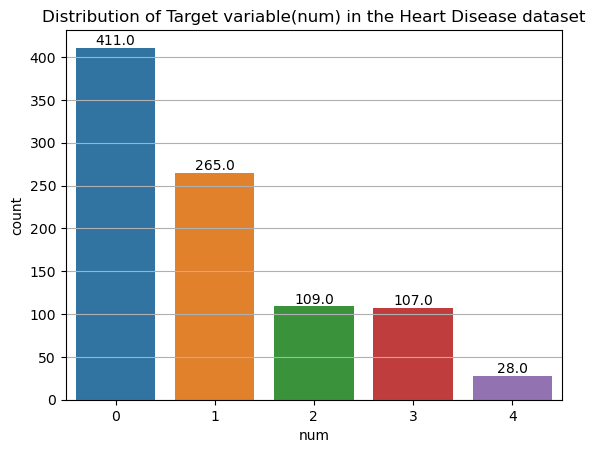

In [361]:
# Visualize the distribution of the target variable
ax = sns.countplot(x='num', data=heart_disease_df)
plt.title('Distribution of Target variable(num) in the Heart Disease dataset')
plt.grid(axis='y')
# Add the frequency of each class on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.show()

##### Histogram for the Numerical Variables

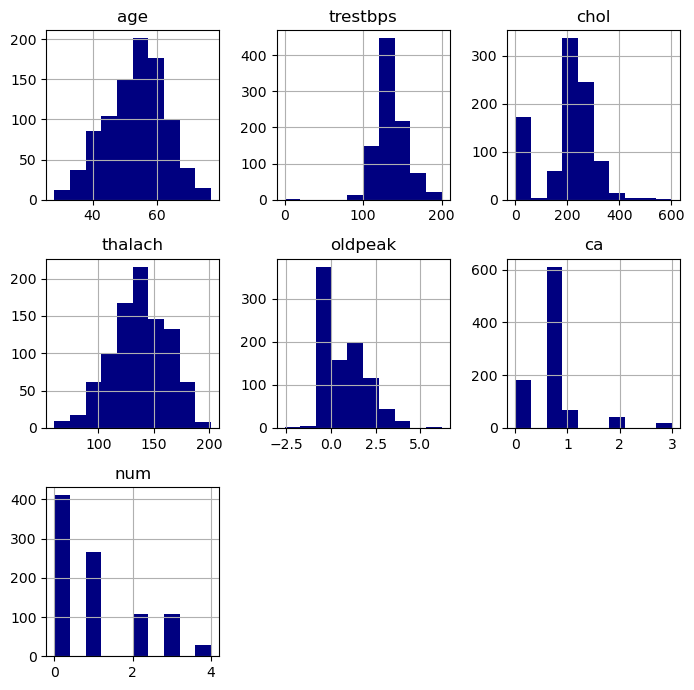

In [362]:
import matplotlib.pyplot as plt
# Plot histograms for each numerical feature
heart_disease_df.hist(figsize=(7, 7), color='navy')
plt.tight_layout()  # Ensures that plots don't overlap
plt.show()

##### Correlation Heatmap for the attributes to find relation or strength between them

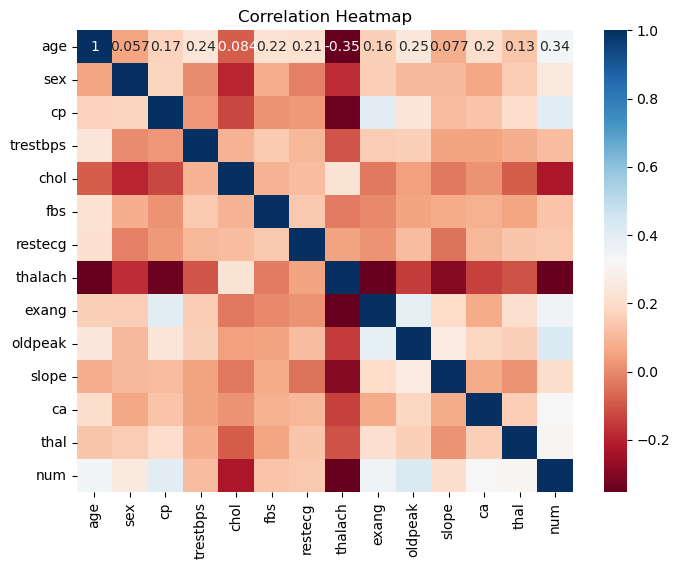

In [363]:
#Correlation heatmap before splitting
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = heart_disease_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='RdBu') 
#other colours Blues, coolwarm, 
plt.title('Correlation Heatmap')
plt.show()

### Data Partition to Train and Test

We are performing Data Partition as our initial step before EDA or other processing is to ensure that the Test Data remains unseen. Employing Stratified sampling to ensure that the distribution of the target variable (classes) is preserved in both the training and testing sets, we split the data in 70:30 ratio for training and testing respectively. Using "Stratified" is particularly important when dealing with imbalanced datasets, where one class may be significantly more frequent than another. Using stratified sampling during the splitting process is essential to ensure that both sets are representative of the overall dataset, especially when dealing with imbalanced classes.

In [364]:
#Train test split
# Import the necessary library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_2 = heart_disease_df.drop(columns=['num'], axis=1)
y_2 = heart_disease_df['num']

# Split the dataset into training and test sets using stratified sampling technique
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_2, y_2, test_size=0.3, random_state=42,stratify=y_2, shuffle=True)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train_heart.shape, y_train_heart.shape)
print("Test set shape:", X_test_heart.shape, y_test_heart.shape)

# Check the distribution of classes in train and test sets
print("Training set class distribution:\n", y_train_heart.value_counts(normalize=True))
print("Test set class distribution:\n", y_test_heart.value_counts(normalize=True))


Training set shape: (644, 13) (644,)
Test set shape: (276, 13) (276,)
Training set class distribution:
 num
0    0.447205
1    0.287267
2    0.118012
3    0.116460
4    0.031056
Name: proportion, dtype: float64
Test set class distribution:
 num
0    0.445652
1    0.289855
2    0.119565
3    0.115942
4    0.028986
Name: proportion, dtype: float64


### Exploratory Data Analysis and Visualization

EDA performed on the Train_data is always the right technique to understand the features before modelling.

##### Box plots for outlier detection

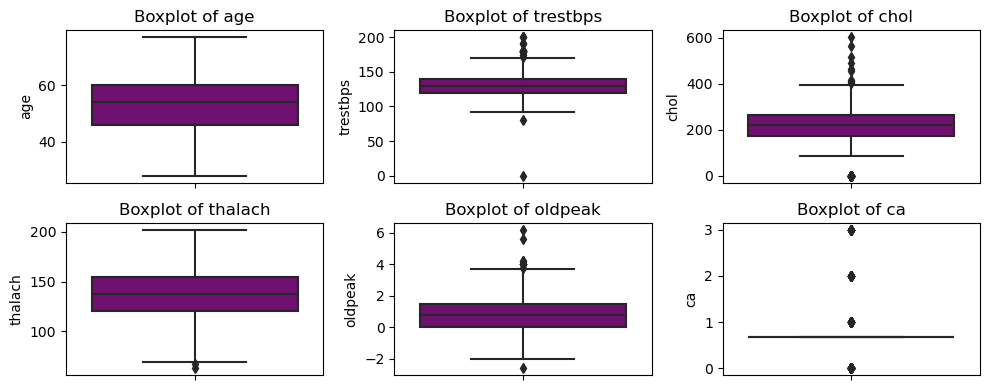

In [366]:
#Boxplots for outlier detection
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid for subplots
n_cols = 3  # Number of columns for the grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Compute rows dynamically
plt.figure(figsize=(10, 4))

# Loop through each numerical feature and create a boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=X_train_heart[col], color='purple') 
    plt.title(f'Boxplot of {col}')
    #plt.yscale('log')  # Apply log scale to each feature
    plt.tight_layout()  # Adjust the layout to prevent overlap

plt.show()


The boxplots on the numerical features reveal that the attributes such as `chol`, `oldpeak`, `tresbps` tend to have many outliers. Also this plot indicates that the data needs to be scaled.

In [367]:
#Loading all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Combine X_train_heart and y_train_heart into one DataFrame
train_data_heart = pd.concat([X_train_heart, y_train_heart], axis=1)
#axis=1: This specifies that the concatenation should happen along the columns (i.e., horizontally). 
#If you used axis=0, it would concatenate along the rows (i.e., vertically).

a) Handling Outliers: 

The boxplots of the numerical features in the heart dataset reveal the distribution and potential outliers for each feature, providing insight into their variability and the presence of extreme values which need to be fixed. 
The code below addresses outliers in the numerical columns of the heart disease dataset by first identifying outliers using ***winsorization*** to cap extreme values. 

After identifying outliers, the code applies winsorization, a technique that limits extreme values in the dataset. In this case, it caps the extreme 5% of values on both ends for each feature. This method reduces the influence of extreme values without completely removing them, thereby preserving the distribution of the data while mitigating the impact of outliers. A boxplot is generated to visually confirm the changes after winsorization.

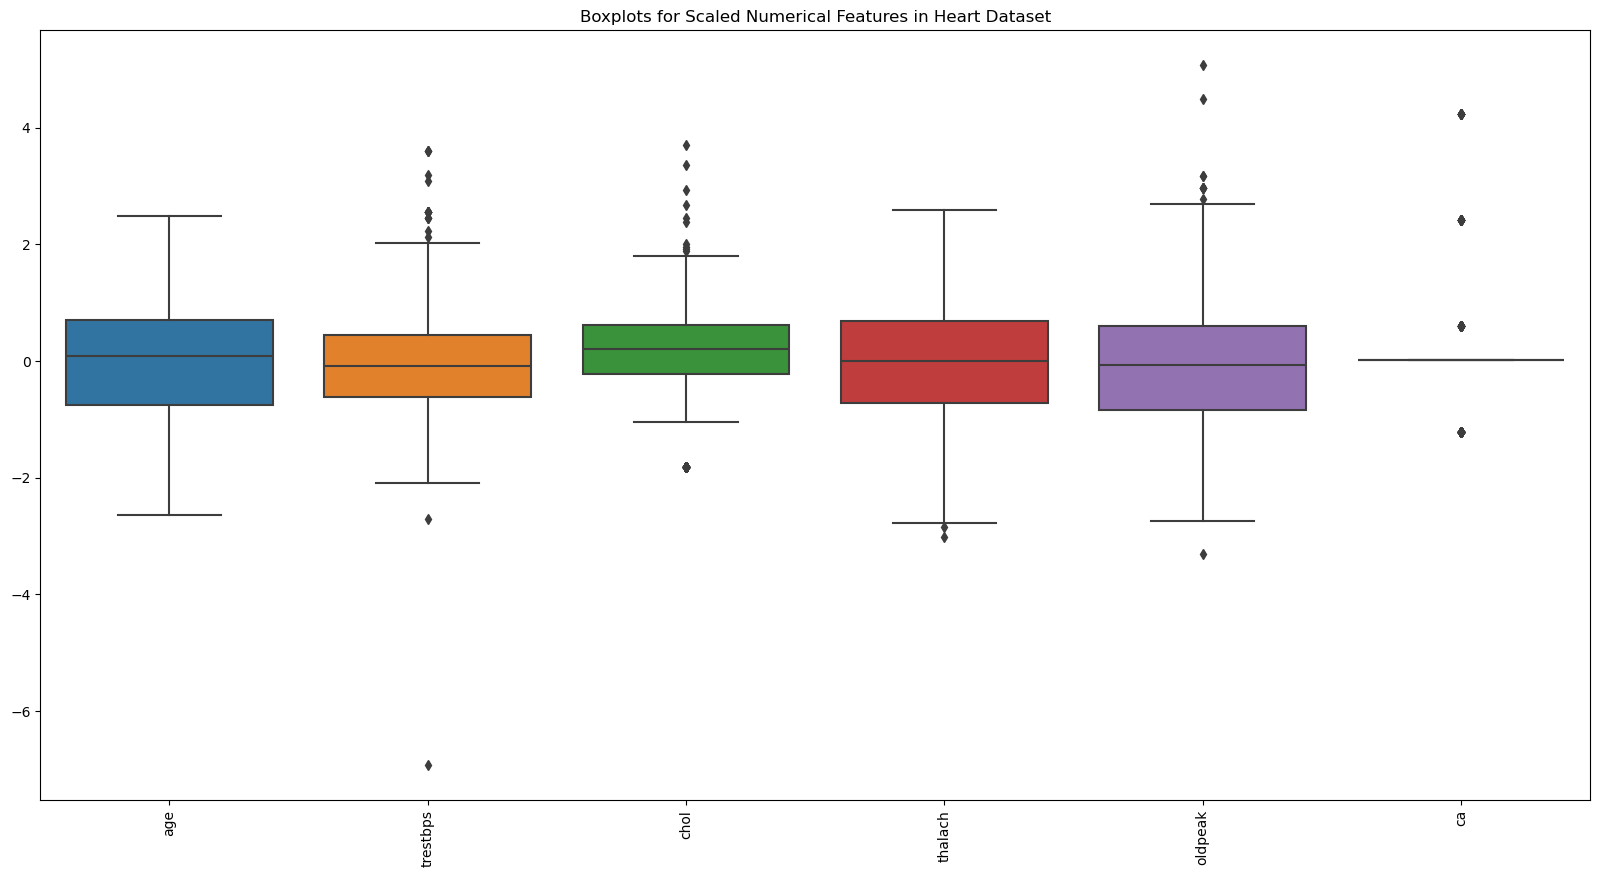

In [375]:
# Numerical columns in X_heart
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']  

# Create a StandardScaler object
scaler_heart = StandardScaler()

# Fit the scaler on the training data and transform it
X_heart_train_scaled = scaler_heart.fit_transform(X_train_heart[numerical_columns])

# Transform the test data 
X_heart_test_scaled = scaler_heart.transform(X_test_heart[numerical_columns])

# Replace the original numerical columns with the scaled ones
X_train_heart[numerical_columns] = X_heart_train_scaled
X_test_heart[numerical_columns] = X_heart_test_scaled

# Create a DataFrame with only the numerical columns for visualization
X_heart_train_scaled_df = pd.DataFrame(X_heart_train_scaled, columns=numerical_columns)
# Convert the scaled test data to a DataFrame
X_heart_test_scaled_df = pd.DataFrame(X_heart_test_scaled, columns=numerical_columns)

# Visualizing outliers using boxplots for each feature in the scaled training data
plt.figure(figsize=(20, 10))
sns.boxplot(data=X_heart_train_scaled_df)
plt.xticks(rotation=90)
plt.title('Boxplots for Scaled Numerical Features in Heart Dataset')
plt.show()


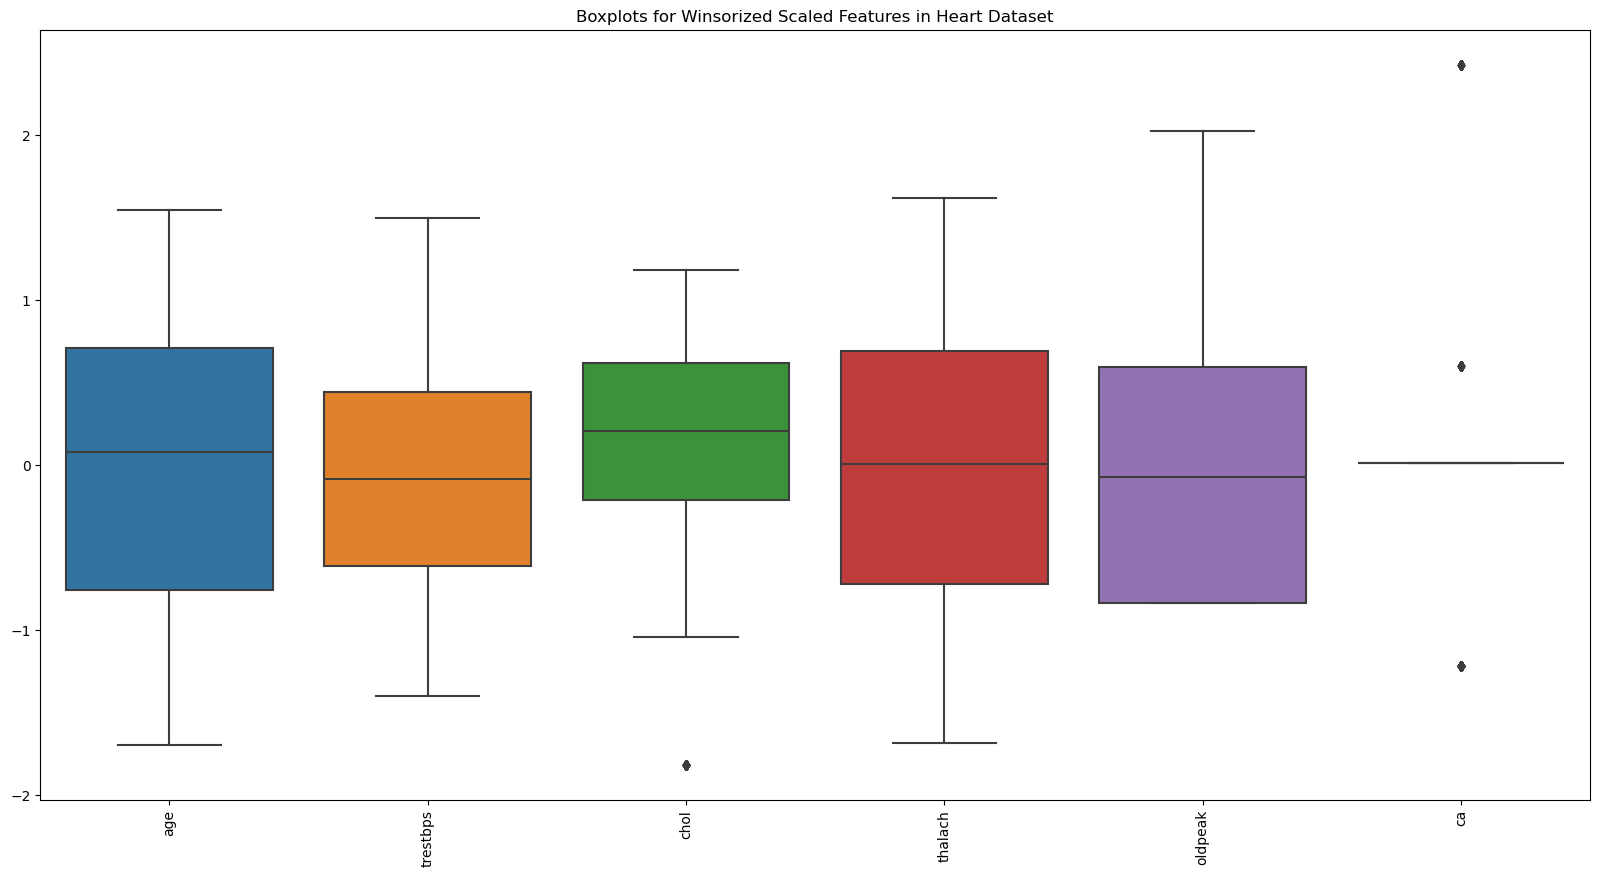

In [377]:
# Applying winsorization to each feature individually
X_train_heart_winsorized = X_train_heart.copy()
# Applying winsorization to each feature individually
X_heart_train_winsorized = X_heart_train_scaled_df.copy()
for col in X_heart_train_winsorized.columns:
    # Capping at 5% on both sides
    X_heart_train_winsorized[col] = mstats.winsorize(X_heart_train_winsorized[col], limits=[0.05, 0.05])

# Visualize the winsorized features to confirm changes
plt.figure(figsize=(20, 10))
sns.boxplot(data=X_heart_train_winsorized)
plt.xticks(rotation=90)
plt.title('Boxplots for Winsorized Scaled Features in Heart Dataset')
plt.show()


In [ ]:
# Equate the original scaled DataFrame to the winsorized features
X_train_heart_fixed = X_train_heart_winsorized.copy()

#### Univariate data visualization

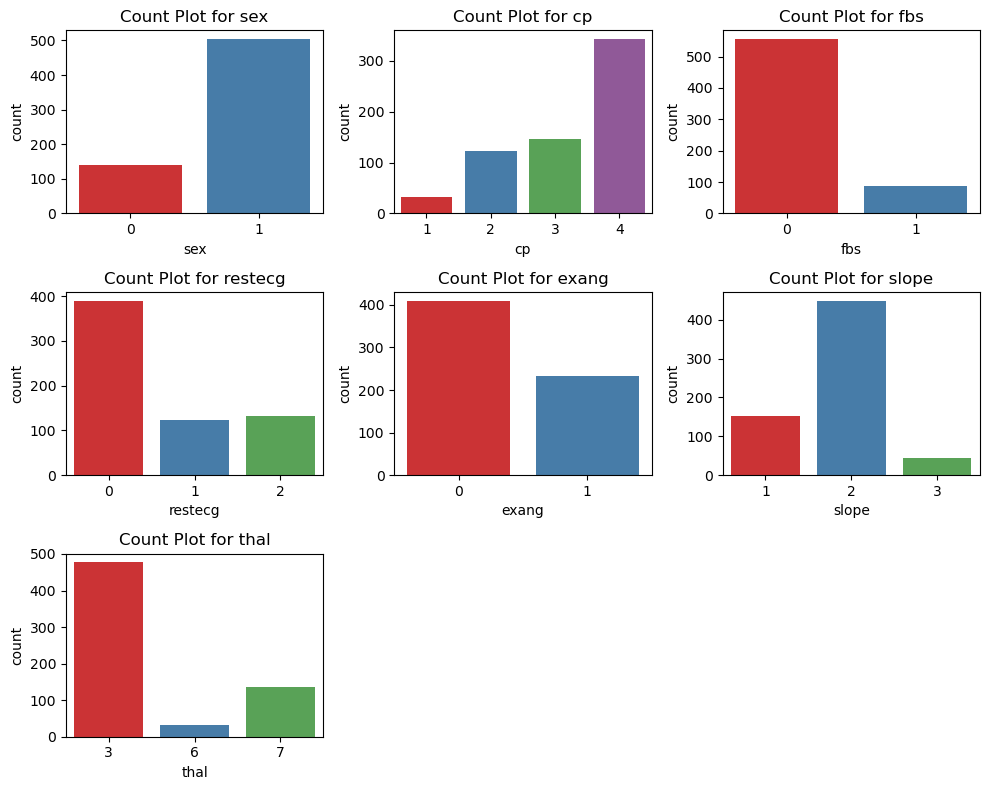

In [378]:
import warnings

# Ignore only FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Set up the grid for subplots
plt.figure(figsize=(10, 8))

# Loop through each categorical column and create a countplot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on the number of columns (3x3 grid here)
    sns.countplot(x=col, data=train_data_heart, palette='Set1')
    plt.title(f'Count Plot for {col}')
    plt.tight_layout()  # Prevent overlap of plots

plt.show()


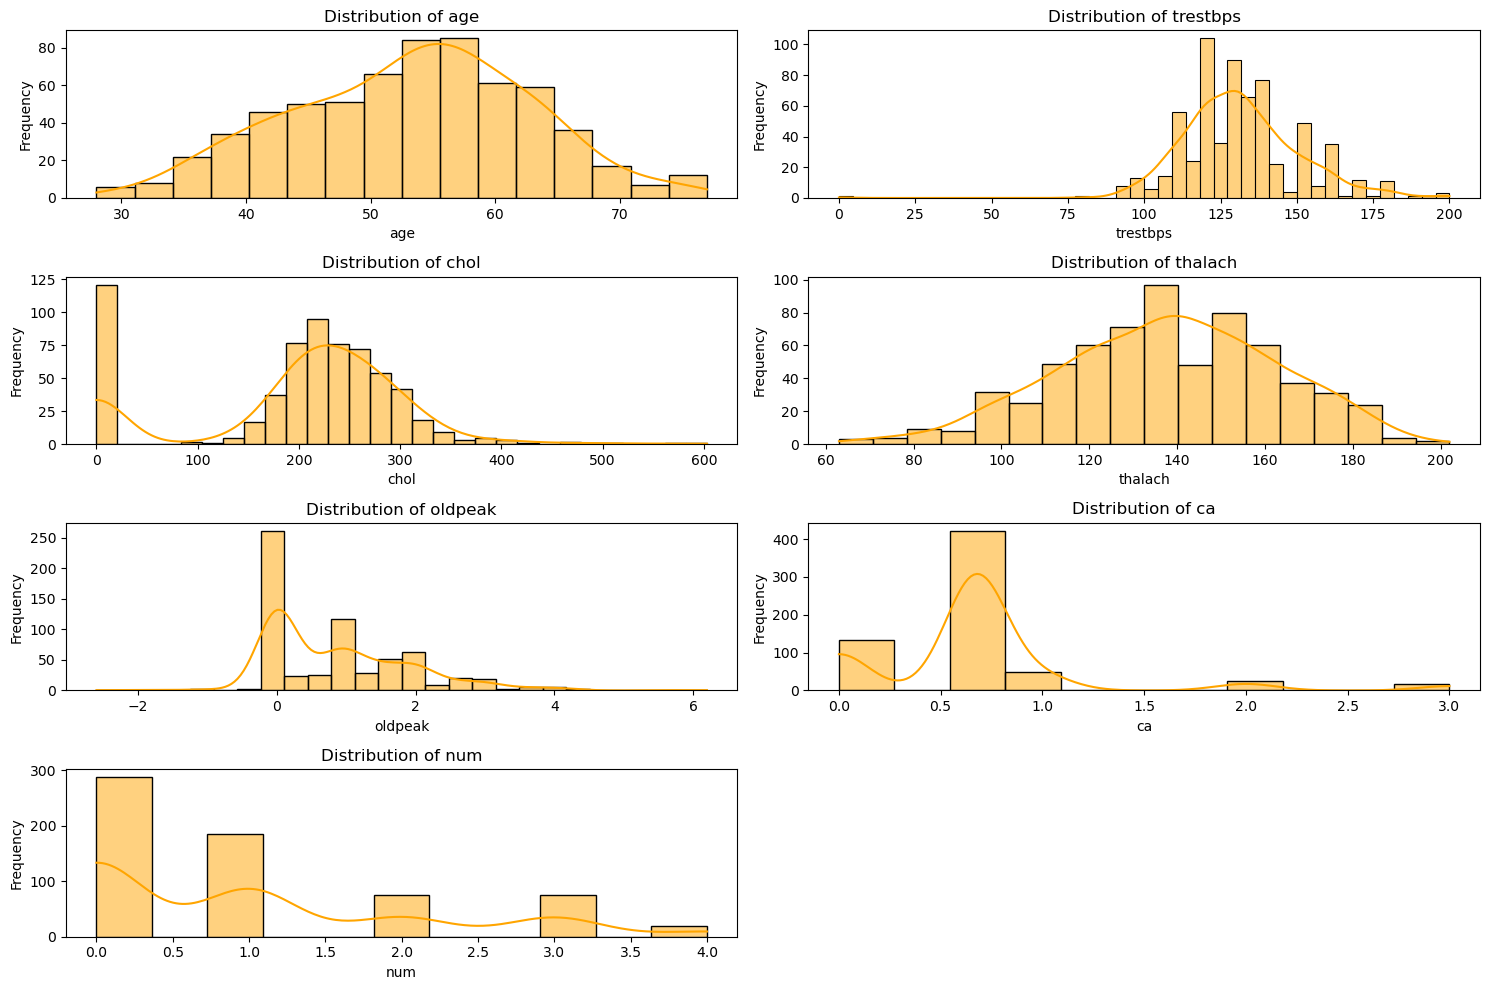

In [379]:
#Univariate analysis List of numerical columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'num']

# Plotting histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(train_data_heart[column],  kde=True, color='orange')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Bivariate data visualization
 

##### Strip Plots

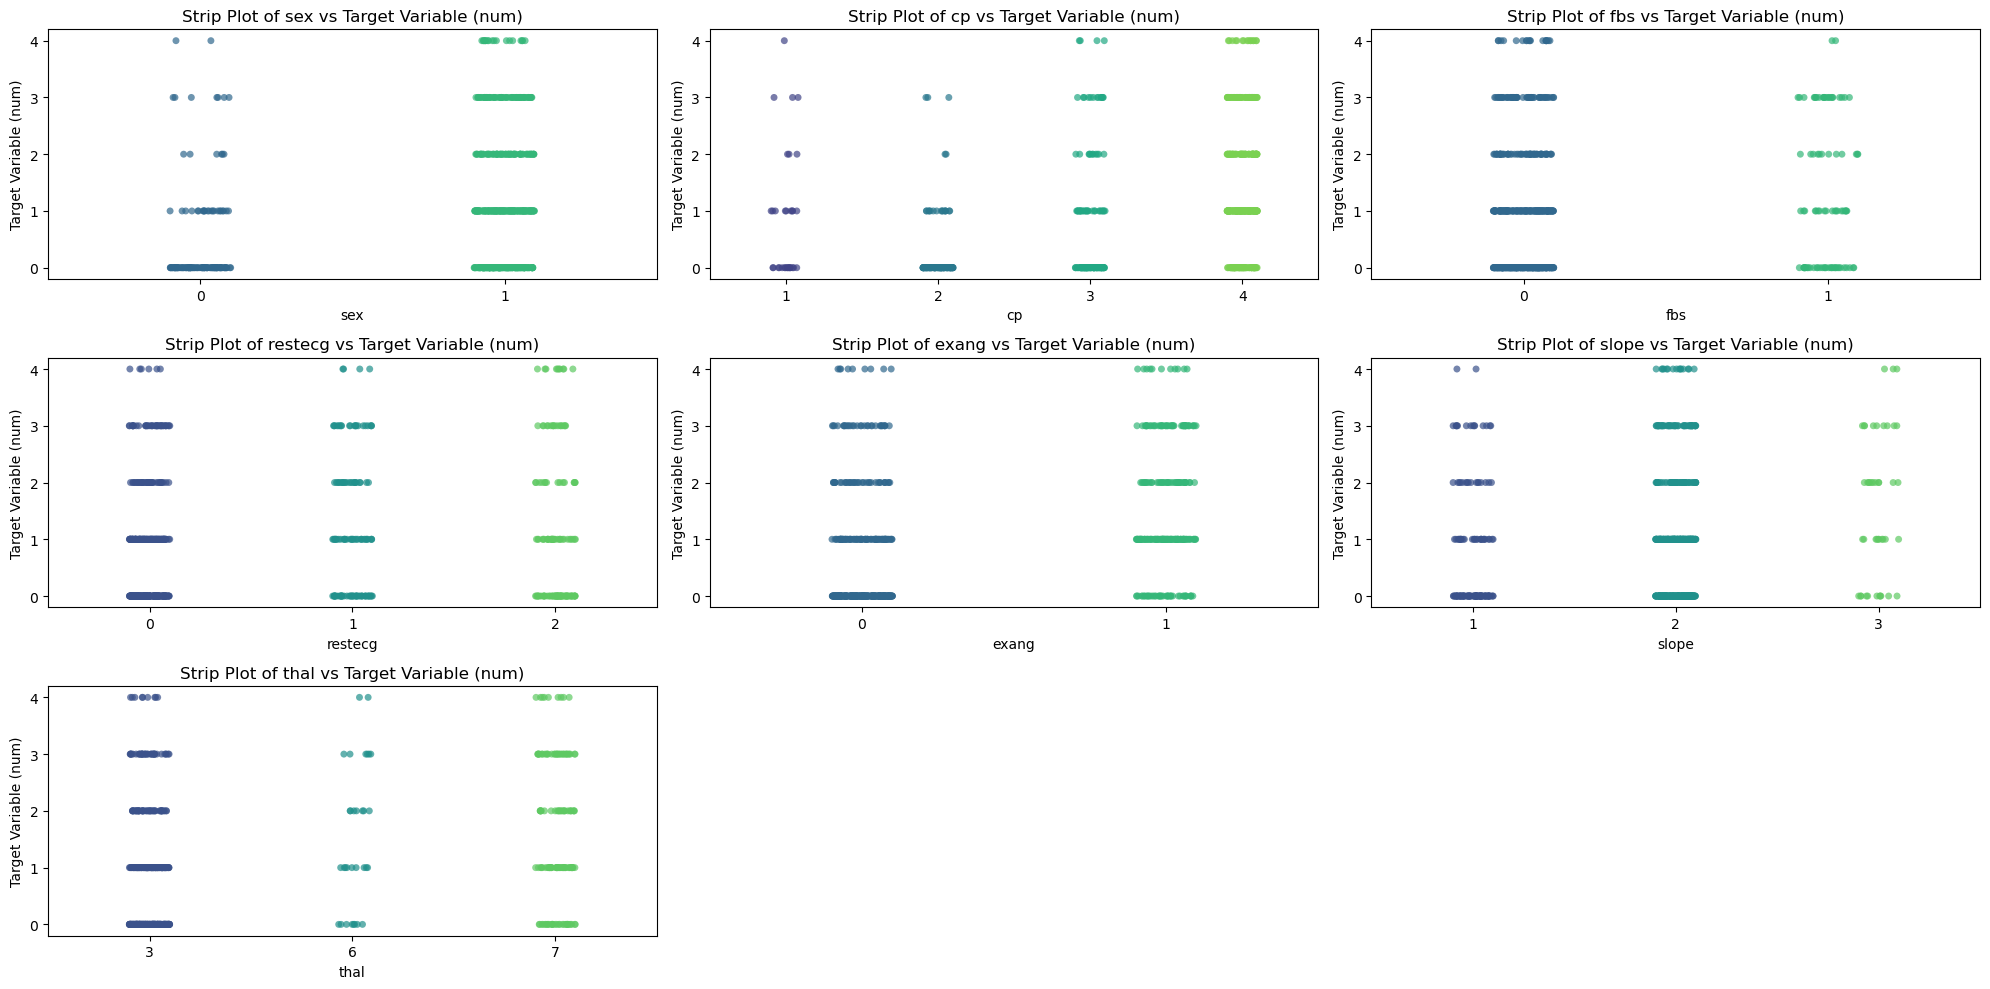

In [380]:
# Set the size of the figure
plt.figure(figsize=(20, 10))

# Loop through each categorical column and create a strip plot
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.stripplot(x=column, y='num', data=train_data_heart, jitter=True, palette='viridis', alpha=0.7)
    plt.title(f'Strip Plot of {column} vs Target Variable (num)')
    plt.xlabel(column)
    plt.ylabel('Target Variable (num)')

plt.tight_layout()
plt.show()


A strip plot is a scatter plot where each data point represents a category in the x axis (categorical feature) and its corresponding target value on the y axis (num in this case, which indicates heart disease presence or absence). Strip plots help to visualize the relationship between categorical features and the target variable (num) in the heart disease dataset. 

Each subplot helps visually assess how the different categories of each feature are distributed in relation to the target variable (num).
The points for a specific category of a feature cluster around certain num values (such as 0 or 1), that might indicate a pattern or relationship between that feature and heart disease. 

Interpretation: For instance, in the strip plot of `cp` Vs `num`, the points of category 2 center around the values 0 and 1 indicating that the patients with chest pain type=atypical anigma have less than 50% chances of getting heart disease or maybe be of a certain kind of heart disease tied to category 1. 

By visually comparing the categorical feature against the target, we assess which features show clear separations between categories based on the target (num), helping to identify important predictors for heart disease. This visualization provides an intuitive way to explore the associations between categorical features and the target variable in the dataset.

##### Pairwise Scatter Plots

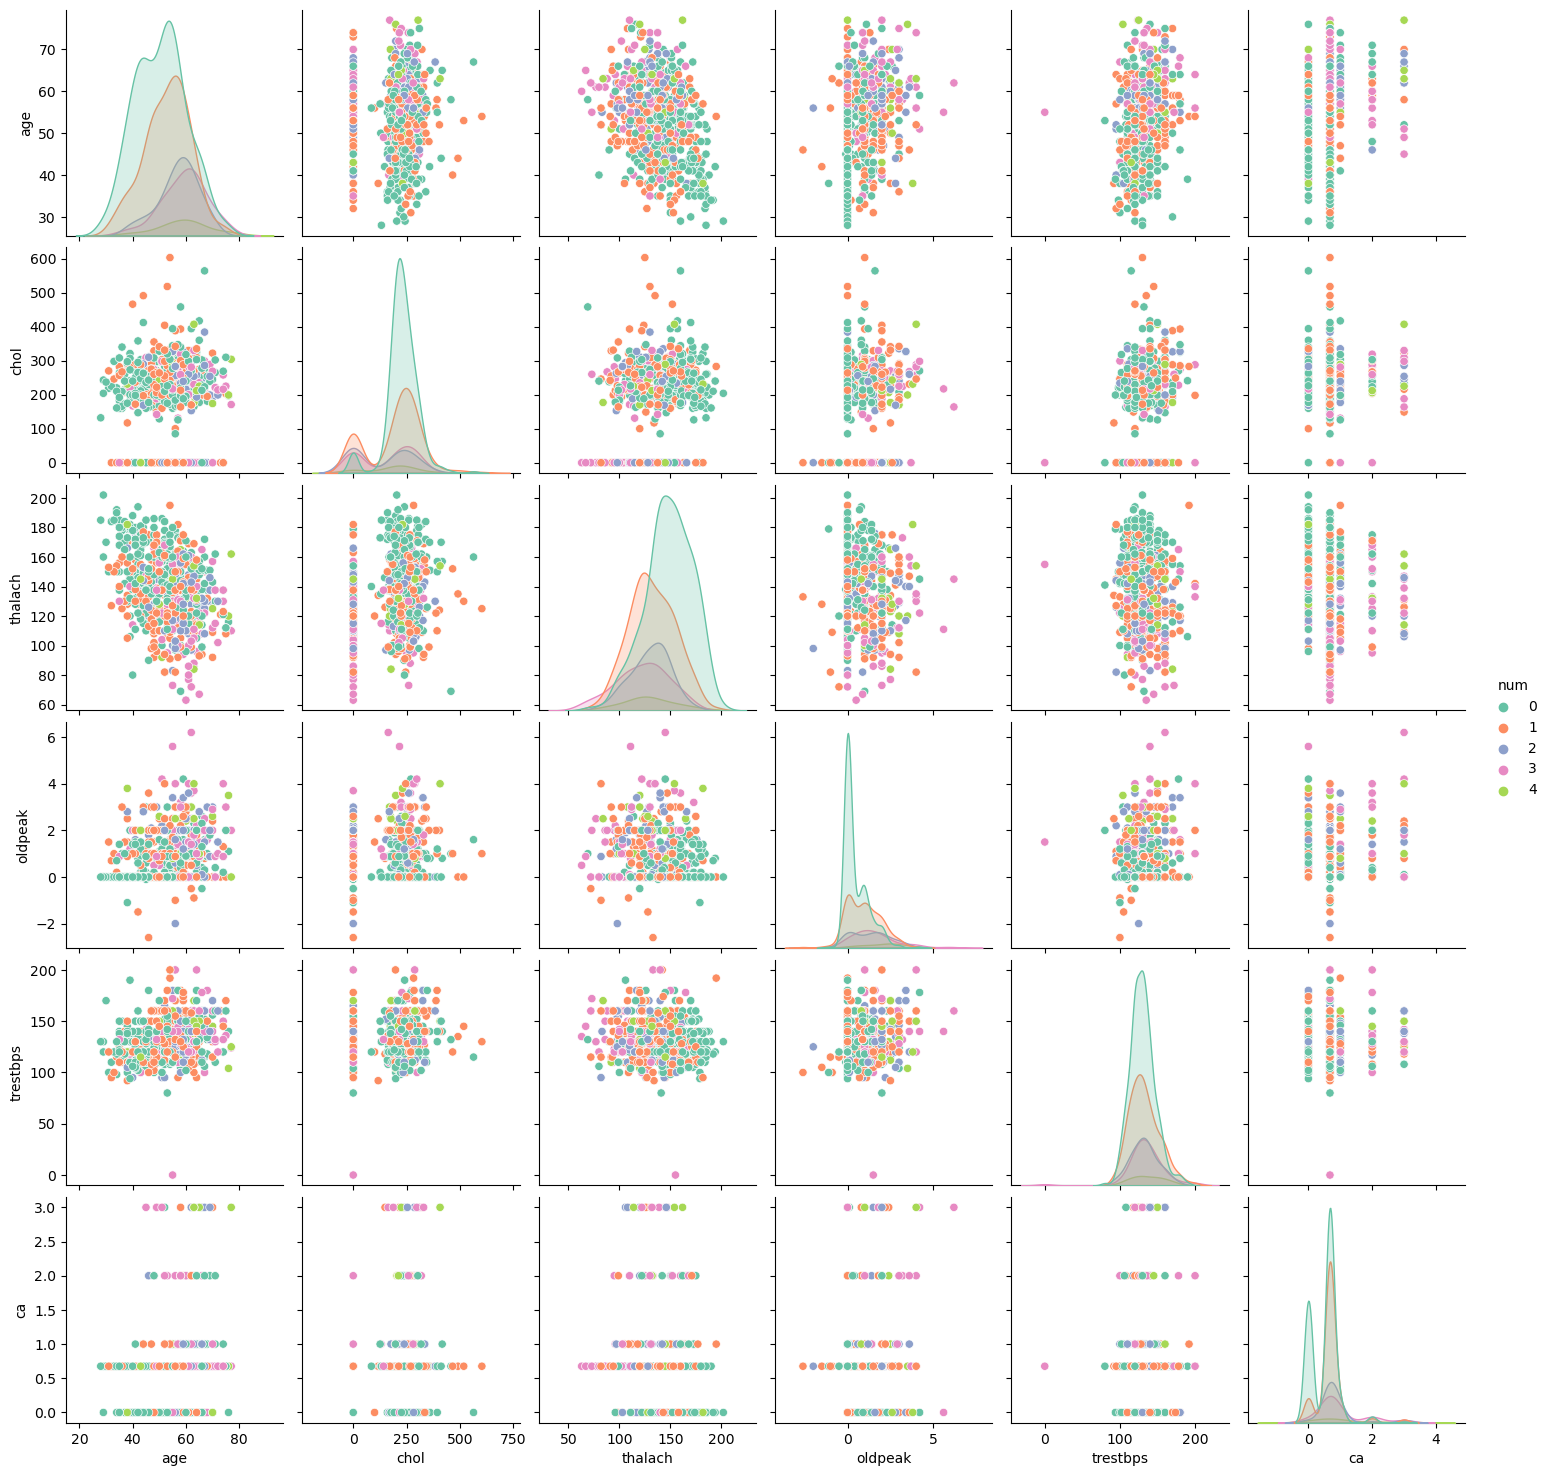

In [381]:
# Define a custom palette with exactly 5 colors
# Create a pairplot with a built-in palette
sns.pairplot(train_data_heart, hue='num', vars=['age', 'chol', 'thalach', 'oldpeak', 'trestbps', 'ca'], palette='Set2')

# Save the plot to a file
plt.savefig('pairplot_heart_disease.png', dpi=200, bbox_inches='tight') 

plt.show()


#### Scaling the Numerical features

Since the data has many outliers, Robust Scaler was considered instead of the Standard scaler because Robust Scaler is less affected by outliers because it scales the data according to the IQR.

In [382]:
#Feature Scaling

# Numerical columns in X_heart
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']  

# Create a RobustScaler object
robust_scaler = RobustScaler()

# Fit and transform the training data using the RobustScaler
X_train_heart_scaled = robust_scaler.fit_transform(X_train_heart_fixed[numerical_columns])

# Transform the test data using the fitted RobustScaler
X_test_heart_scaled = robust_scaler.transform(X_test_heart[numerical_columns])

# Replace the original columns with scaled values
X_train_heart[numerical_columns] = X_train_heart_scaled
X_test_heart[numerical_columns] = X_test_heart_scaled


(-4.0, 4.0)

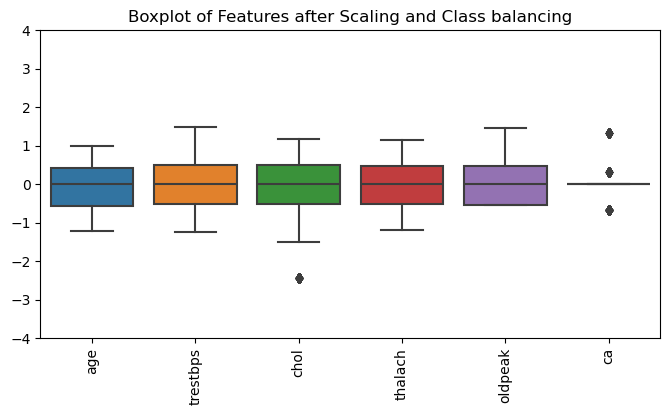

In [383]:
# Boxplot with log scale on the y-axis after Scaling and Class balancing
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot with log scale on the y-axis after Scaling
plt.figure(figsize=(8, 4))
sns.boxplot(data=X_train_heart) 
plt.xticks(rotation=90)
plt.title('Boxplot of Features after Scaling and Class balancing')
# Optional: Adjust the y-axis limits for better visualization
plt.ylim(-4, 4)  # You can set these limits based on your data
# Add feature names as x-axis labels



### Classification : 

1. Model Training and Prediction: For this dataset, we will be training 5 models i,e Random Forest, Decision Tree, SVM, Neural Network, Logistic Regression.  Each model is trained on the training data (`X_train_heart`, `y_train_heart`) and predicts the test data (`X_test_heart`).

2. Metrics Calculation: 
Accuracy: Using accuracy_score()

Sensitivity (Recall): Using recall_score() with macro-averaging to handle multiple classes.

Specificity: Custom specificity_score() function.

Precision: Using precision_score() with macro-averaging.

F1 Macro: Using f1_score() with macro-averaging to handle class imbalance.

Confusion Matrices: Each model's confusion matrix is calculated and displayed using a pandas.DataFrame for easy readability.

Styled DataFrame: The styled_metrics_df uses conditional formatting to highlight the best model in each metric.

Metric Curves: A line graph is plotted for the comparison of all metrics (accuracy, sensitivity, specificity, precision, and F1 Macro) across all models. Each metric is represented by a line, and the models are plotted on the x-axis.

#### One-Versus-Rest Approach
The one-versus-rest (OvR) strategy is commonly used for multi-class classification problems. It involves training one classifier per class, with the class being classified as positive and all others as negative. Each classifier produces a decision boundary for the corresponding class, and during prediction, the class with the highest confidence is selected.


In [384]:
#Defining the Specificity Score
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    specificity_list = []
    
    for i in range(cm.shape[0]):
        true_negatives = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
        false_positives = cm[:, i].sum() - cm[i, i]
        
        if (true_negatives + false_positives) > 0:
            specificity = true_negatives / (true_negatives + false_positives)
        else:
            specificity = 0.0
        
        specificity_list.append(specificity)
    
    return np.mean(specificity_list)  # Return average specificity across all classes


#### SVM model: 


Confusion Matrix - SVM
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4
Actual 0          109           11            0            3            0
Actual 1           19           55            0            6            0
Actual 2            6           18            0            9            0
Actual 3            5           21            0            6            0
Actual 4            1            5            0            2            0

SVM - Accuracy: 0.6159, Sensitivity: 0.6159, Specificity: 0.8870, Precision: 0.5187


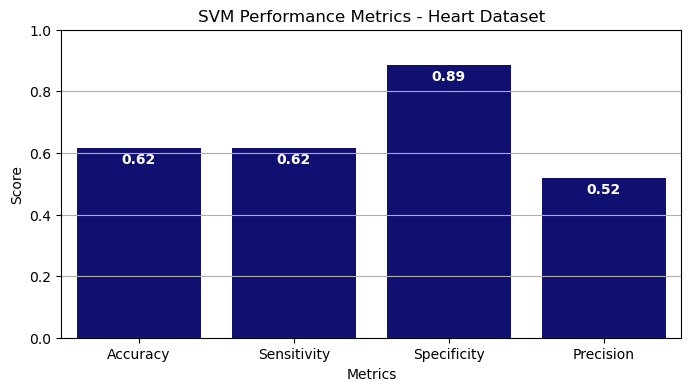

In [385]:
# Train SVM model on scaled training data
svm_model = SVC(random_state=42)
svm_model.fit(X_train_heart, y_train_heart)

# Predict on scaled test data
y_heart_pred_svm = svm_model.predict(X_test_heart)

# Calculate confusion matrix
cm_svm = confusion_matrix(y_test_heart, y_heart_pred_svm)

# Convert the confusion matrix into a pandas DataFrame
cm_df_svm = pd.DataFrame(cm_svm, 
                          index=[f'Actual {cls}' for cls in class_names], 
                          columns=[f'Predicted {cls}' for cls in class_names])

# Display the confusion matrix
print("\nConfusion Matrix - SVM")
print(cm_df_svm)

# Calculate metrics
accuracy_svm = accuracy_score(y_test_heart, y_heart_pred_svm)
sensitivity_svm = recall_score(y_test_heart, y_heart_pred_svm, average='weighted')
specificity_svm = specificity_score(y_test_heart, y_heart_pred_svm)
precision_svm = precision_score(y_test_heart, y_heart_pred_svm, average='weighted', zero_division=0)

# Display performance metrics
print(f"\nSVM - Accuracy: {accuracy_svm:.4f}, "
      f"Sensitivity: {sensitivity_svm:.4f}, "
      f"Specificity: {specificity_svm:.4f}, "
      f"Precision: {precision_svm:.4f}")

# Define the metrics for the SVM model
metrics_svm = {
    'Accuracy': accuracy_svm,
    'Sensitivity': sensitivity_svm,
    'Specificity': specificity_svm,
    'Precision': precision_svm
}

# Create a DataFrame
metrics_df_svm = pd.DataFrame(list(metrics_svm.items()), columns=['Metric', 'Score'])

plt.figure(figsize=(8, 4))
sns.barplot(data=metrics_df_svm, x='Metric', y='Score', color='navy')  
plt.title('SVM Performance Metrics - Heart Dataset')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Annotate the bars with their values inside the bars
for i, v in enumerate(metrics_df_svm['Score']):
    plt.text(i, v - 0.05, f"{v:.2f}", ha='center', fontweight='bold', color='white')  

plt.show()



#### Decision Tree: 


Confusion Matrix - Decision Tree
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4
Actual 0           82           32            6            2            1
Actual 1           19           37           10           12            2
Actual 2           10            6            8            6            3
Actual 3            3            7           10            9            3
Actual 4            2            2            2            2            0

Decision Tree - Accuracy: 0.4928, Sensitivity: 0.4928, Specificity: 0.8598, Precision: 0.5029


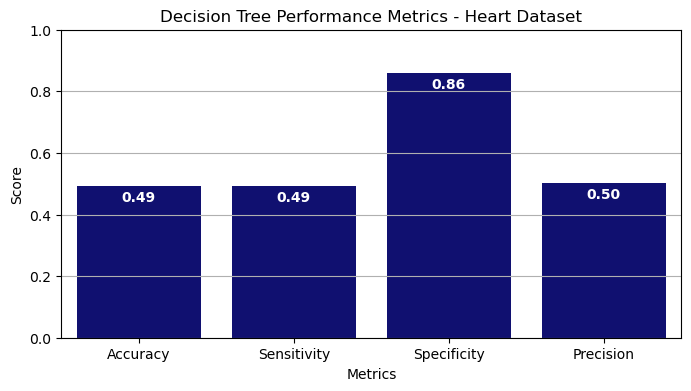

In [386]:
# Train Decision Tree model on scaled training data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_heart, y_train_heart)

# Predict on scaled test data
y_heart_pred_dt = dt_model.predict(X_test_heart)

# Calculate confusion matrix
cm_dt = confusion_matrix(y_test_heart, y_heart_pred_dt)

# Convert the confusion matrix into a pandas DataFrame
cm_df_dt = pd.DataFrame(cm_dt, 
                        index=[f'Actual {cls}' for cls in class_names], 
                        columns=[f'Predicted {cls}' for cls in class_names])

# Display the confusion matrix
print("\nConfusion Matrix - Decision Tree")
print(cm_df_dt)

# Calculate metrics
accuracy_dt = accuracy_score(y_test_heart, y_heart_pred_dt)
sensitivity_dt = recall_score(y_test_heart, y_heart_pred_dt, average='weighted')
specificity_dt = specificity_score(y_test_heart, y_heart_pred_dt)
precision_dt = precision_score(y_test_heart, y_heart_pred_dt, average='weighted')

# Display performance metrics
print(f"\nDecision Tree - Accuracy: {accuracy_dt:.4f}, "
      f"Sensitivity: {sensitivity_dt:.4f}, "
      f"Specificity: {specificity_dt:.4f}, "
      f"Precision: {precision_dt:.4f}")

# Define the metrics for the Decision Tree model
metrics_dt = {
    'Accuracy': accuracy_dt,
    'Sensitivity': sensitivity_dt,
    'Specificity': specificity_dt,
    'Precision': precision_dt
}

# Create a DataFrame for seaborn
metrics_df_dt = pd.DataFrame(list(metrics_dt.items()), columns=['Metric', 'Score'])

plt.figure(figsize=(8, 4))
sns.barplot(data=metrics_df_dt, x='Metric', y='Score', color='navy')  
plt.title('Decision Tree Performance Metrics - Heart Dataset')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Annotate the bars with their values inside the bars
for i, v in enumerate(metrics_df_dt['Score']):
    plt.text(i, v - 0.05, f"{v:.2f}", ha='center', fontweight='bold', color='white')  

plt.show()

#### Random Forest


Confusion Matrix - Random Forest
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4
Actual 0          106           14            1            2            0
Actual 1           23           40            6           11            0
Actual 2            7            9            0           17            0
Actual 3            5            9            5           12            1
Actual 4            0            1            2            4            1

Random Forest - Accuracy: 0.5761, Sensitivity: 0.5761, Specificity: 0.8804, Precision: 0.5386


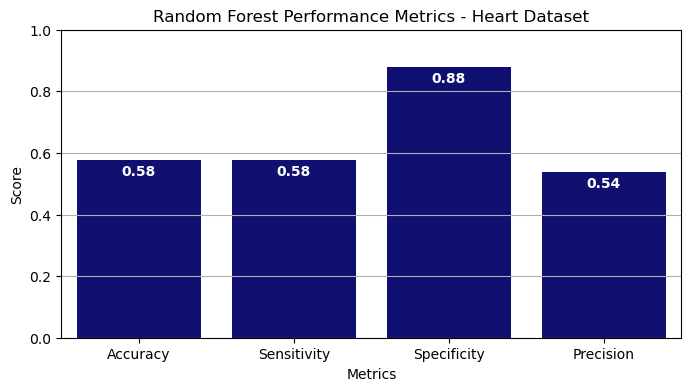

In [387]:
# Train Random Forest model on scaled training data
rf_heart = RandomForestClassifier(random_state=42)
rf_heart.fit(X_train_heart, y_train_heart)

# Predict on scaled test data
y_heart_pred = rf_heart.predict(X_test_heart)

# Calculate confusion matrix
cm_heart = confusion_matrix(y_test_heart, y_heart_pred)

# Determine class names from the unique values in y_heart_test
class_names = sorted(set(y_test_heart))

# Convert the confusion matrix into a pandas DataFrame for a table-like format
cm_df_heart = pd.DataFrame(cm_heart, 
                            index=[f'Actual {cls}' for cls in class_names], 
                            columns=[f'Predicted {cls}' for cls in class_names])

# Display the confusion matrix as a table
print("\nConfusion Matrix - Random Forest")
print(cm_df_heart)

# Calculate metrics
accuracy_heart = accuracy_score(y_test_heart, y_heart_pred)
sensitivity_heart = recall_score(y_test_heart, y_heart_pred, average='weighted')  # Recall is the same as sensitivity
specificity_heart = specificity_score(y_test_heart, y_heart_pred)  # Custom specificity function
precision_heart = precision_score(y_test_heart, y_heart_pred, average='weighted')

# Display performance metrics
print(f"\nRandom Forest - Accuracy: {accuracy_heart:.4f}, "
      f"Sensitivity: {sensitivity_heart:.4f}, "
      f"Specificity: {specificity_heart:.4f}, "
      f"Precision: {precision_heart:.4f}")

# Define the metrics for the Random Forest model
metrics = {
    'Accuracy': accuracy_heart,
    'Sensitivity': sensitivity_heart,
    'Specificity': specificity_heart,
    'Precision': precision_heart
}

# Create a DataFrame for seaborn
metrics_df_heart = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])

plt.figure(figsize=(8, 4))
sns.barplot(data=metrics_df_heart, x='Metric', y='Score', color='navy')  
plt.title('Random Forest Performance Metrics - Heart Dataset')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Annotate the bars with their values inside the bars
for i, v in enumerate(metrics_df_heart['Score']):
    plt.text(i, v - 0.05, f"{v:.2f}", ha='center', fontweight='bold', color='white')  

plt.show()


#### Neural Network model

C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Confusion Matrix - Neural Network
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4
Actual 0          105           12            3            3            0
Actual 1           22           35            7           16            0
Actual 2            5           10            5           13            0
Actual 3            5           13            7            7            0
Actual 4            0            3            3            2            0

Neural Network - Accuracy: 0.5507, Sensitivity: 0.3323, Specificity: 0.8751, Precision: 0.3233


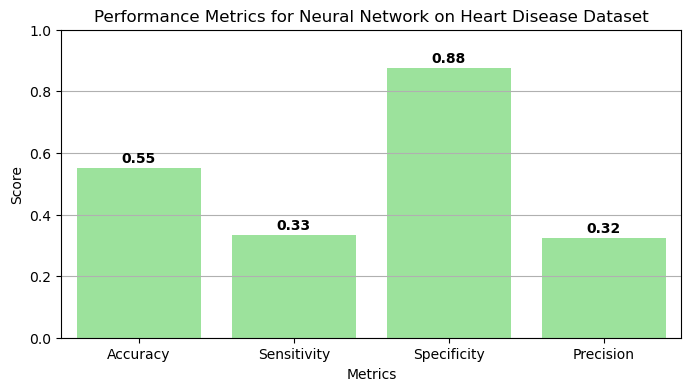

In [388]:
# Define the Neural Network model
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_heart.shape[1],)))  # Input layer
model.add(Dense(8, activation='relu'))  # Hidden layer
model.add(Dense(5, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_heart, y_train_heart, epochs=100, batch_size=10, verbose=0)

# Predict on test data
y_heart_pred_nn = np.argmax(model.predict(X_test_heart), axis=-1)  # Use argmax for multi-class

# Calculate confusion matrix
cm_nn = confusion_matrix(y_test_heart, y_heart_pred_nn)

# Convert the confusion matrix into a pandas DataFrame for a table-like format
cm_df_nn = pd.DataFrame(cm_nn, 
                         index=[f'Actual {i}' for i in range(cm_nn.shape[0])], 
                         columns=[f'Predicted {i}' for i in range(cm_nn.shape[1])])

# Display the confusion matrix as a table
print("\nConfusion Matrix - Neural Network")
print(cm_df_nn)

# Calculate metrics
accuracy_nn = accuracy_score(y_test_heart, y_heart_pred_nn)
sensitivity_nn = recall_score(y_test_heart, y_heart_pred_nn, average='macro')  # Average for multi-class
precision_nn = precision_score(y_test_heart, y_heart_pred_nn, average='macro', zero_division=0)  # Average for multi-class

# Calculate specificity for each class
specificity_nn = []
for i in range(cm_nn.shape[0]):
    true_negatives = cm_nn.sum() - cm_nn[i, :].sum() - cm_nn[:, i].sum() + cm_nn[i, i]
    false_positives = cm_nn[:, i].sum() - cm_nn[i, i]
    specificity_nn.append(true_negatives / (true_negatives + false_positives))

# Average specificity across all classes
average_specificity_nn = np.mean(specificity_nn)

# Display performance metrics
print(f"\nNeural Network - Accuracy: {accuracy_nn:.4f}, "
      f"Sensitivity: {sensitivity_nn:.4f}, "
      f"Specificity: {average_specificity_nn:.4f}, "
      f"Precision: {precision_nn:.4f}")

# Plot performance metrics
metrics = {
    'Accuracy': accuracy_nn,
    'Sensitivity': sensitivity_nn,
    'Specificity': average_specificity_nn,
    'Precision': precision_nn
}

plt.figure(figsize=(8, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), color='lightgreen')  
plt.title('Performance Metrics for Neural Network on Heart Disease Dataset')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Annotate the bars with their values inside the bars
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold') 

plt.show()


#### Logistic Regression model: 

Before we proceed with Logisitc Regression model we need to check for the categorical variables and encode them to avoid Data Leakage. 

##### One-Hot Encoding
One-hot encoding is a technique used to represent categorical variables as binary vectors. Each category is transformed into a unique binary column. For example, if a categorical variable has three categories, it will be represented by three binary columns

In [ ]:
#To check the data types before performing logistic regression. All the categorical variables need to be encoded
print(X_test_heart.dtypes)

In [389]:
#Performing One-hot encoding for Logistic regression
# Import necessary library
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame with your training data
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']  # Update this with your categorical columns

# One-hot encoding for training data
encoder = OneHotEncoder(sparse=False, drop='first')  # Use drop='first' to avoid dummy variable trap
X_train_encoded = encoder.fit_transform(X_train_heart[categorical_columns])

# Convert to DataFrame and concatenate with numeric features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_train_final = pd.concat([X_train_heart.drop(categorical_columns, axis=1).reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)

# Do the same for test data
X_test_encoded = encoder.transform(X_test_heart[categorical_columns])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test_final = pd.concat([X_test_heart.drop(categorical_columns, axis=1).reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)


Now the features are ready for logistic regression model fitting. 


Confusion Matrix - Logistic Regression
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4
Actual 0          108            8            2            5            0
Actual 1           21           36            7           15            1
Actual 2            5            7            2           19            0
Actual 3            5            9            5           11            2
Actual 4            1            0            1            5            1

Logistic Regression - Accuracy: 0.5725, Sensitivity: 0.5725, Specificity: 0.8830, Precision: 0.5622


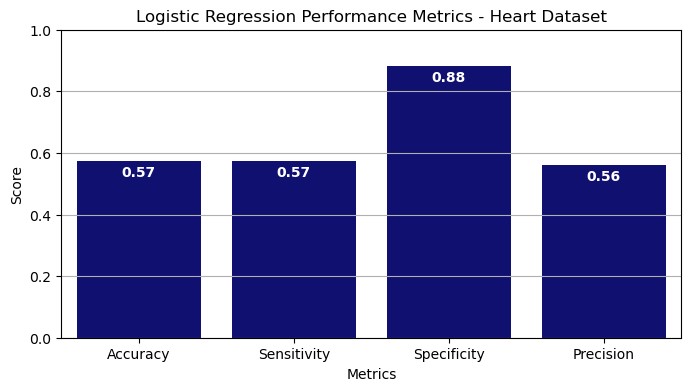

In [391]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression model on processed training data
log_reg_heart = LogisticRegression(max_iter=1000, random_state=42)
log_reg_heart.fit(X_train_final, y_train_heart)  # Use the processed training data

# Predict on processed test data
y_heart_pred = log_reg_heart.predict(X_test_final)  # Use the processed test data

# Calculate confusion matrix
cm_heart = confusion_matrix(y_test_heart, y_heart_pred)

# Determine class names from the unique values in y_test_heart
class_names = sorted(set(y_test_heart))

# Convert the confusion matrix into a pandas DataFrame for a table-like format
cm_df_heart = pd.DataFrame(cm_heart, 
                            index=[f'Actual {cls}' for cls in class_names], 
                            columns=[f'Predicted {cls}' for cls in class_names])

# Display the confusion matrix as a table
print("\nConfusion Matrix - Logistic Regression")
print(cm_df_heart)

# Calculate metrics
accuracy_heart = accuracy_score(y_test_heart, y_heart_pred)
sensitivity_heart = recall_score(y_test_heart, y_heart_pred, average='weighted')  # Recall is the same as sensitivity
specificity_heart = specificity_score(y_test_heart, y_heart_pred)  # Custom specificity function
precision_heart = precision_score(y_test_heart, y_heart_pred, average='weighted')

# Display performance metrics
print(f"\nLogistic Regression - Accuracy: {accuracy_heart:.4f}, "
      f"Sensitivity: {sensitivity_heart:.4f}, "
      f"Specificity: {specificity_heart:.4f}, "
      f"Precision: {precision_heart:.4f}")

# Define the metrics for the Logistic Regression model
metrics = {
    'Accuracy': accuracy_heart,
    'Sensitivity': sensitivity_heart,
    'Specificity': specificity_heart,
    'Precision': precision_heart
}

# Create a DataFrame for seaborn
metrics_df_heart = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])

# Plotting the performance metrics for Logistic Regression
plt.figure(figsize=(8, 4))
sns.barplot(data=metrics_df_heart, x='Metric', y='Score', color='navy')  
plt.title('Logistic Regression Performance Metrics - Heart Dataset')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Annotate the bars with their values inside the bars
for i, v in enumerate(metrics_df_heart['Score']):
    plt.text(i, v - 0.05, f"{v:.2f}", ha='center', fontweight='bold', color='white')  

plt.show()


The evaluation of the model performance metrics highlights significant differences in their predictive capabilities. 


### Dimensionality Reduction to increase the performance metrics

##### Principal Component Analysis:

In [395]:
X_heart_train=X_train_heart
X_heart_test=X_test_heart
y_heart_train=y_train_heart
y_heart_test=y_test_heart
# Define categorical and numerical columns
categorical_cols = X_heart_train.select_dtypes(include=['object']).columns
numerical_cols = X_heart_train.select_dtypes(include=['float64', 'int64']).columns

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # Keep numerical columns as they are
        ('cat', OneHotEncoder(), categorical_cols)  # Apply One-Hot Encoding to categorical columns
    ])

# Apply the preprocessor to the training and test data
X_heart_train_encoded = preprocessor.fit_transform(X_heart_train)
X_heart_test_encoded = preprocessor.transform(X_heart_test)

# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_heart_train_encoded)
X_test_pca = pca.transform(X_heart_test_encoded)

# Print the shape of the new feature set
print(f"Original number of features: {X_heart_train.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

# Create a dictionary to store model performances
model_performance = {}

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_heart_train)
y_pred_rf = rf_model.predict(X_test_pca)
model_performance['Random Forest'] = [
    accuracy_score(y_heart_test, y_pred_rf),
    recall_score(y_heart_test, y_pred_rf, average='macro'),
    recall_score(y_heart_test, y_pred_rf, average='micro'),
    precision_score(y_heart_test, y_pred_rf, average='macro', zero_division=0)
]
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_heart_test, y_pred_rf))
print("\n")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_pca, y_heart_train)
y_pred_dt = dt_model.predict(X_test_pca)
model_performance['Decision Tree'] = [
    accuracy_score(y_heart_test, y_pred_dt),
    recall_score(y_heart_test, y_pred_dt, average='macro'),
    recall_score(y_heart_test, y_pred_dt, average='micro'),
    precision_score(y_heart_test, y_pred_dt, average='macro', zero_division=0)
]
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_heart_test, y_pred_dt))
print("\n")

# SVM
svm_model = SVC()
svm_model.fit(X_train_pca, y_heart_train)
y_pred_svm = svm_model.predict(X_test_pca)
model_performance['SVM'] = [
    accuracy_score(y_heart_test, y_pred_svm),
    recall_score(y_heart_test, y_pred_svm, average='macro'),
    recall_score(y_heart_test, y_pred_svm, average='micro'),
    precision_score(y_heart_test, y_pred_svm, average='macro', zero_division=0)
]
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_heart_test, y_pred_svm))
print("\n")

# Neural Network
nn_model_heart = Sequential()
nn_model_heart.add(Dense(16, activation='relu', input_shape=(X_train_pca.shape[1],)))  # Input layer
nn_model_heart.add(Dense(8, activation='relu'))  # Hidden layer
nn_model_heart.add(Dense(5, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
nn_model_heart.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model_heart.fit(X_train_pca, y_heart_train, epochs=100, batch_size=10, verbose=0)

# Predict on test data
y_heart_pred_nn = np.argmax(nn_model_heart.predict(X_test_pca), axis=-1)  # Use argmax for multi-class
model_performance['Neural Network'] = [
    accuracy_score(y_heart_test, y_heart_pred_nn),
    recall_score(y_heart_test, y_heart_pred_nn, average='macro'),
    recall_score(y_heart_test, y_heart_pred_nn, average='micro'),
    precision_score(y_heart_test, y_heart_pred_nn, average='macro', zero_division=0)
]
print("Confusion Matrix for Neural Network:")
print(confusion_matrix(y_heart_test, y_heart_pred_nn))
print("\n")

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
log_reg_model.fit(X_train_pca, y_heart_train)
y_pred_log_reg = log_reg_model.predict(X_test_pca)

# Store performance metrics
model_performance['Logistic Regression'] = [
    accuracy_score(y_heart_test, y_pred_log_reg),
    recall_score(y_heart_test, y_pred_log_reg, average='macro'),
    recall_score(y_heart_test, y_pred_log_reg, average='micro'),
    precision_score(y_heart_test, y_pred_log_reg, average='macro', zero_division=0)
]

# Print confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_heart_test, y_pred_log_reg))
print("\n")


# Display the Model Performance
comparison_data = {
    'Model': model_performance.keys(),
    'Accuracy': [v[0] for v in model_performance.values()],
    'Sensitivity': [v[1] for v in model_performance.values()],
    'Specificity': [v[2] for v in model_performance.values()],
    'Precision': [v[3] for v in model_performance.values()]
}

# Create a DataFrame
comparison_df = pd.DataFrame(comparison_data).set_index('Model')

# Print the comparison table
print("\nModel Performance Metrics Comparison after PCA:")
print(comparison_df)


Original number of features: 13
Reduced number of features after PCA: 6
Confusion Matrix for Random Forest:
[[98 15  1  9  0]
 [34 30  5 11  0]
 [ 4  8  3 18  0]
 [ 5 13  3  9  2]
 [ 1  2  1  4  0]]


Confusion Matrix for Decision Tree:
[[74 33  6  8  2]
 [21 33  5 16  5]
 [ 8  9  3 12  1]
 [12  7  2 10  1]
 [ 1  1  3  3  0]]


Confusion Matrix for SVM:
[[106  12   2   3   0]
 [ 36  34   0  10   0]
 [  9   8   1  15   0]
 [ 10  15   0   7   0]
 [  4   1   0   3   0]]




C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Confusion Matrix for Neural Network:
[[96 16  2  9  0]
 [34 24  5 16  1]
 [12  2  2 17  0]
 [ 8  6  5 13  0]
 [ 0  2  0  6  0]]


Confusion Matrix for Logistic Regression:
[[99 15  4  5  0]
 [32 27  3 17  1]
 [10  6  2 14  1]
 [ 8  9  2 13  0]
 [ 1  2  0  3  2]]



Model Performance Metrics Comparison after PCA:
                     Accuracy  Sensitivity  Specificity  Precision
Model                                                             
Random Forest        0.507246     0.308781     0.507246   0.307711
Decision Tree        0.434783     0.283507     0.434783   0.279500
SVM                  0.536232     0.307168     0.536232   0.329136
Neural Network       0.489130     0.309469     0.489130   0.295194
Logistic Regression  0.518116     0.371847     0.518116   0.409889


The performance of various models applied after Principal Component Analysis (PCA) can be summarized as follows:

Random Forest : The Random Forest model demonstrates moderate accuracy but relatively low sensitivity, indicating that it struggles to correctly identify positive cases. The specificity matches the accuracy, suggesting that it performs similarly for both positive and negative cases. Precision is also low, indicating a significant number of false positives.

Decision Tree : The Decision Tree model shows the lowest overall performance with an accuracy of 43.5%. Sensitivity and precision are also low, suggesting it is not effectively identifying or classifying the positive cases, which is critical in medical contexts.

Support Vector Machine (SVM): The SVM model performs slightly better than the Decision Tree and Random Forest with an accuracy of 53.6%. However, its sensitivity remains low, indicating that it fails to capture a significant number of actual positive cases.

Neural Network : The Neural Network shows an accuracy of 48.9%, with low sensitivity and precision similar to the Random Forest and SVM. It suggests an inability to effectively differentiate between classes.

Logistic Regression: Logistic Regression achieves an accuracy of 51.8%, the highest sensitivity among the models at 37.2%, and the best precision at 40.9%. This indicates a slightly better performance in identifying positive cases compared to other models, although still not ideal.

***Overall Performance Insight:***

Best Model: Among the models evaluated, Logistic Regression appears to be the best performer, offering the highest accuracy, sensitivity, and precision, although all models demonstrate suboptimal performance.

Sensitivity Concerns: All models show relatively low sensitivity, indicating a potential issue with identifying true positive cases, which is critical in medical diagnoses.

Next Steps: Further scope of this lies in exploring other techniques such as hyperparameter tuning or exploring other algorithms.